##### ÁªèËøáÊâãÂä®Ë∞ÉÊï¥dfÔºåÂç≥Âà†Èô§‰∏çÂøÖË¶ÅÁöÑË°åÔºåÂ¶ÇË°å2012-2013Q1ÔºåÂ∞ÜdfÂèò‰∏∫Êï∞ÊçÆÈõÜdata


In [1]:
# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import nsdiffs, ndiffs
from pmdarima import auto_arima
import os

In [2]:
file_path = r"C:\Users\huawei\OneDrive\Ê°åÈù¢\data.xlsx"

# ËØªÂèñÊï∞ÊçÆÔºåtimeÂàóËß£Êûê‰∏∫Êó•Êúü‰ΩÜ‰∏çËÆæ‰∏∫Á¥¢Âºï
df1 = pd.read_excel(file_path, parse_dates=['time'])

# ÊåâÊó∂Èó¥Âàó‰ªéÂ∞èÂà∞Â§ßÊéíÂ∫è
df1 = df1.sort_values('time').reset_index(drop=True)

print(df1.dtypes)
print(f"\nÊï∞ÊçÆÂΩ¢Áä∂Ôºö{df1.shape}")

time                      datetime64[ns]
ln_gdp_sa                        float64
ln_gdp_seasonal_factor           float64
dln_gdp_sa                       float64
city_mean_light                  float64
region_mean_light                float64
ln_city                          float64
ln_region                        float64
GDP                              float64
ln_gdp                           float64
pc1                              float64
pc2                              float64
pc3                              float64
dpc2                             float64
quarter                            int64
dln_city                         float64
dln_region                       float64
dtype: object

Êï∞ÊçÆÂΩ¢Áä∂Ôºö(64, 17)


In [ ]:
# ËÆ°ÁÆódf1‰∏≠‰∏ªË¶ÅÂèòÈáèÁöÑÁªüËÆ°ÊÄßÊèèËø∞ - Ë°®Ê†ºÊ†ºÂºè
import pandas as pd
import numpy as np

# ÂÆö‰πâË¶ÅÂàÜÊûêÁöÑÂèòÈáèÂèäÂÖ∂Ëã±ÊñáÂêçÁß∞
variables_info = {
    'GDP': 'GDP (Yuan billions)',
    'city_mean_light': 'Shenzhen City Average Light Value', 
    'region_mean_light': 'Guangdong Province Average Light Value',
    'pc1': 'Principal Component 1',
    'pc2': 'Principal Component 2', 
    'pc3': 'Principal Component 3'
}

# ËÆ°ÁÆóÊÄªËßÇÊµãÊï∞Ôºà‰ΩøÁî®ÊâÄÊúâÂèòÈáèÈÉΩÊúâÊï∞ÊçÆÁöÑË°åÊï∞Ôºâ
available_vars = [var for var in variables_info.keys() if var in df1.columns]
if available_vars:
    complete_data = df1[available_vars].dropna()
    total_n = len(complete_data)
else:
    total_n = len(df1)

print("Descriptive Statistics of Variables")
print("="*50)
print(f"Characteristic\tN = {total_n}")
print("="*50)

for var, var_name in variables_info.items():
    if var in df1.columns:
        data = df1[var].dropna()
        
        # ËÆ°ÁÆóÁªüËÆ°Èáè
        mean_val = data.mean()
        median_val = data.median()
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        sd_val = data.std()
        min_val = data.min()
        max_val = data.max()
        
        # Ê†ºÂºèÂåñÊï∞ÂÄº - Ê†πÊçÆÊï∞ÂÄºÂ§ßÂ∞èÈÄâÊã©ÂêàÈÄÇÁöÑÊ†ºÂºè
        if abs(mean_val) >= 1000:
            mean_str = f"{mean_val:,.0f}"
            median_str = f"{median_val:,.0f}"
            q1_str = f"{q1:,.0f}"
            q3_str = f"{q3:,.0f}"
            sd_str = f"{sd_val:,.0f}"
            min_str = f"{min_val:,.0f}"
            max_str = f"{max_val:,.0f}"
        elif abs(mean_val) >= 1:
            mean_str = f"{mean_val:.2f}"
            median_str = f"{median_val:.2f}"
            q1_str = f"{q1:.2f}"
            q3_str = f"{q3:.2f}"
            sd_str = f"{sd_val:.2f}"
            min_str = f"{min_val:.2f}"
            max_str = f"{max_val:.2f}"
        else:
            mean_str = f"{mean_val:.4f}"
            median_str = f"{median_val:.4f}"
            q1_str = f"{q1:.4f}"
            q3_str = f"{q3:.4f}"
            sd_str = f"{sd_val:.4f}"
            min_str = f"{min_val:.4f}"
            max_str = f"{max_val:.4f}"
        
        # ÊâìÂç∞ÁªüËÆ°‰ø°ÊÅØ
        print(f"{var_name}")
        print(f"    Mean\t{mean_str}")
        print(f"    Median(Q1/Q3)\t{median_str}({q1_str}/{q3_str})")
        print(f"    SD\t{sd_str}")
        print(f"    Min / Max\t{min_str} / {max_str}")
        
    else:
        print(f"{var_name}")
        print("    Data not available")
    
    print()  # Á©∫Ë°åÂàÜÈöî

print("="*50)
print("Source: Data from Excel file 'data.xlsx'")
print("Note: Statistics calculated from available observations.")
print("Missing values are excluded from calculations.")
print("All variables are quarterly data.")

=== ‰∏ªË¶ÅÂèòÈáèÁöÑÁªüËÆ°ÊÄßÊèèËø∞ÔºàÁÆÄÂåñÁâàÔºâ===

              ÂèòÈáèÂêç  ËßÇÊµãÂÄº        ÂùáÂÄº    25%ÂàÜ‰ΩçÊï∞       ‰∏≠‰ΩçÊï∞    75%ÂàÜ‰ΩçÊï∞       Ê†áÂáÜÂ∑Æ      ÂÅèÂ∫¶      Â≥∞Â∫¶       ÊúÄÂ∞èÂÄº        ÊúÄÂ§ßÂÄº
              GDP   64 5406.8398 3230.0125 5184.6450 7459.3750 2482.8472  0.1454 -1.0511 1634.6500 10867.5900
  city_mean_light   64   17.1011   14.5502   15.6861   19.9836    3.4115  0.7260 -0.8418   12.5532    23.9568
region_mean_light   64    1.8368    1.3796    1.6867    2.3433    0.6106  0.4165 -1.0729    0.9530     3.0145
              pc1   64   -0.0081   -0.3007   -0.0030    0.3257    0.5021 -0.1128  0.1824   -1.3010     1.0589
              pc2   64   -0.0126   -0.1591   -0.0839    0.0444    0.1988  1.2100  0.3325   -0.2351     0.5059
              pc3   64    0.0014   -0.0568   -0.0092    0.0365    0.1106  0.3060  3.4488   -0.3947     0.3137

ÁªüËÆ°ÊåáÊ†áËØ¥ÊòéÔºö
- ËßÇÊµãÂÄºÔºöÊúâÊïàÊï∞ÊçÆÁÇπÊï∞ÈáèÔºàÂéªÈô§Áº∫Â§±ÂÄºÔºâ
- ÂùáÂÄºÔºöÁÆóÊúØÂπ≥ÂùáÊï∞
- 25%ÂàÜ‰

In [3]:
# ÂéªÊéâdfÊúÄÂêé5Ë°å
df = df1[:-5]
print(f"Âà†Èô§ÂêéÊï∞ÊçÆÂΩ¢Áä∂Ôºö{df.shape}")

Âà†Èô§ÂêéÊï∞ÊçÆÂΩ¢Áä∂Ôºö(59, 17)


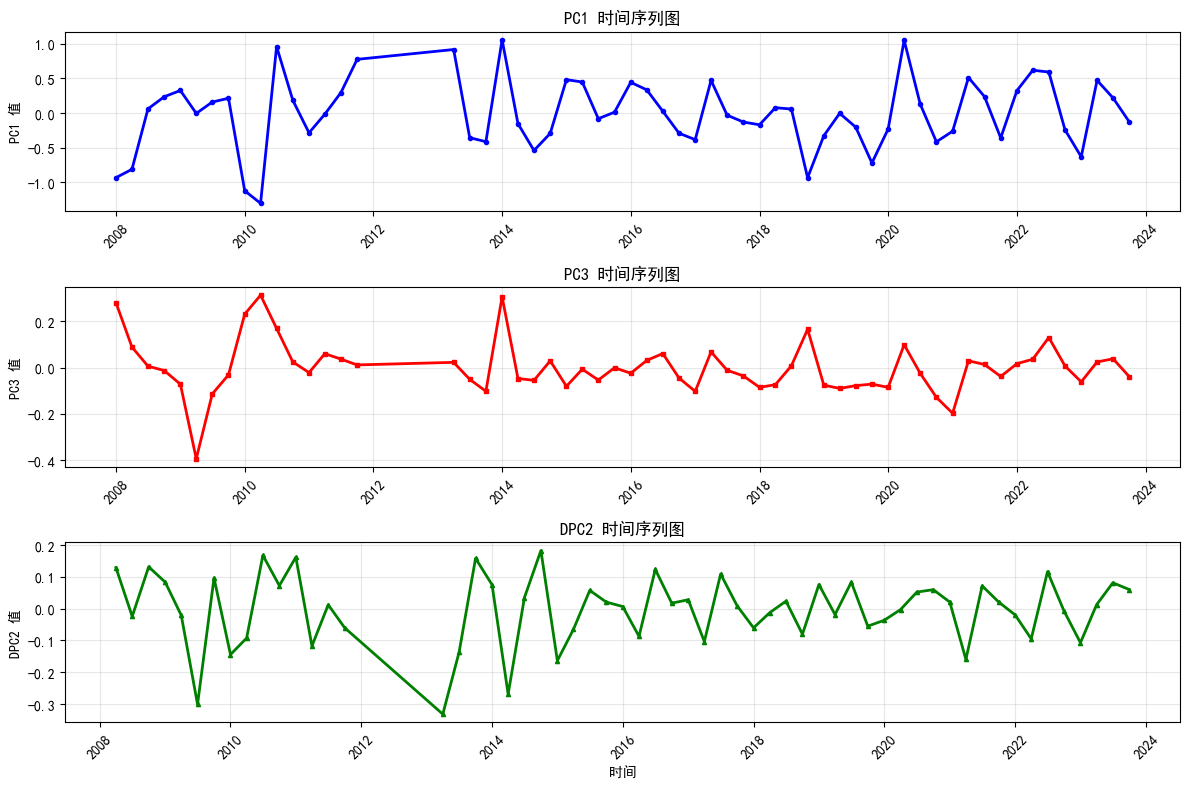

In [4]:
# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# ÂàõÂª∫Â≠êÂõæ
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

# ÁªòÂà∂‰∏â‰∏™ÂèòÈáèÁöÑÊäòÁ∫øÂõæ
variables = ['pc1', 'pc3', 'dpc2']
colors = ['blue', 'red', 'green']
markers = ['o', 's', '^']

for i, (var, color, marker) in enumerate(zip(variables, colors, markers)):
    axes[i].plot(df['time'], df[var], linewidth=2, color=color, marker=marker, markersize=3)
    axes[i].set_title(f'{var.upper()} Êó∂Èó¥Â∫èÂàóÂõæ', fontsize=12)
    axes[i].set_ylabel(f'{var.upper()} ÂÄº')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

axes[-1].set_xlabel('Êó∂Èó¥')
plt.tight_layout()
plt.show()

In [5]:
var1 = ['dln_gdp_sa', 'dln_city', 'dln_region', 'pc1', 'pc3', 'dpc2']
for var1 in var1:
    mean_val = df[var1].mean()
    std_val = df[var1].std()
    min_val = df[var1].min()
    max_val = df[var1].max()
    threshold = mean_val + 3 * std_val
    
    # Ê£ÄÊü•ÂºÇÂ∏∏ÂÄº
    outliers = df[df[var1] > threshold]
    
    print(f"\n{var1.upper()}:")
    print(f"  ÂùáÂÄº: {mean_val:.4f}")
    print(f"  Ê†áÂáÜÂ∑Æ: {std_val:.4f}")
    print(f"  ÊúÄÂ∞èÂÄº: {min_val:.4f}")
    print(f"  ÊúÄÂ§ßÂÄº: {max_val:.4f}")
    print(f"  ÂºÇÂ∏∏ÂÄºÈòàÂÄº (ÂùáÂÄº+3œÉ): {threshold:.4f}")
    
    if len(outliers) > 0:
        print(f"  ÂèëÁé∞ {len(outliers)} ‰∏™ÂºÇÂ∏∏ÂÄº:")
        for idx, row in outliers.iterrows():
            print(f"    Êó∂Èó¥: {row['time']}, ÂÄº: {row[var1]:.4f}")
    else:
        print(f"  Êú™ÂèëÁé∞ÂºÇÂ∏∏ÂÄº")


DLN_GDP_SA:
  ÂùáÂÄº: 0.0244
  Ê†áÂáÜÂ∑Æ: 0.0540
  ÊúÄÂ∞èÂÄº: -0.1816
  ÊúÄÂ§ßÂÄº: 0.1482
  ÂºÇÂ∏∏ÂÄºÈòàÂÄº (ÂùáÂÄº+3œÉ): 0.1864
  Êú™ÂèëÁé∞ÂºÇÂ∏∏ÂÄº

DLN_CITY:
  ÂùáÂÄº: 0.0124
  Ê†áÂáÜÂ∑Æ: 0.1121
  ÊúÄÂ∞èÂÄº: -0.5235
  ÊúÄÂ§ßÂÄº: 0.4759
  ÂºÇÂ∏∏ÂÄºÈòàÂÄº (ÂùáÂÄº+3œÉ): 0.3487
  ÂèëÁé∞ 1 ‰∏™ÂºÇÂ∏∏ÂÄº:
    Êó∂Èó¥: 2022-10-01 00:00:00, ÂÄº: 0.4759

DLN_REGION:
  ÂùáÂÄº: 0.0191
  Ê†áÂáÜÂ∑Æ: 0.0981
  ÊúÄÂ∞èÂÄº: -0.4312
  ÊúÄÂ§ßÂÄº: 0.3915
  ÂºÇÂ∏∏ÂÄºÈòàÂÄº (ÂùáÂÄº+3œÉ): 0.3135
  ÂèëÁé∞ 1 ‰∏™ÂºÇÂ∏∏ÂÄº:
    Êó∂Èó¥: 2022-10-01 00:00:00, ÂÄº: 0.3915

PC1:
  ÂùáÂÄº: -0.0000
  Ê†áÂáÜÂ∑Æ: 0.5142
  ÊúÄÂ∞èÂÄº: -1.3010
  ÊúÄÂ§ßÂÄº: 1.0589
  ÂºÇÂ∏∏ÂÄºÈòàÂÄº (ÂùáÂÄº+3œÉ): 1.5425
  Êú™ÂèëÁé∞ÂºÇÂ∏∏ÂÄº

PC3:
  ÂùáÂÄº: -0.0000
  Ê†áÂáÜÂ∑Æ: 0.1148
  ÊúÄÂ∞èÂÄº: -0.3947
  ÊúÄÂ§ßÂÄº: 0.3137
  ÂºÇÂ∏∏ÂÄºÈòàÂÄº (ÂùáÂÄº+3œÉ): 0.3444
  Êú™ÂèëÁé∞ÂºÇÂ∏∏ÂÄº

DPC2:
  ÂùáÂÄº: -0.0036
  Ê†áÂáÜÂ∑Æ: 0.1113
  ÊúÄÂ∞èÂÄº: -0.3318
  ÊúÄÂ§ßÂÄº: 0.1828
  ÂºÇÂ∏∏ÂÄºÈòàÂÄº (ÂùáÂÄº+3œÉ): 0.3304
  Êú™ÂèëÁé∞ÂºÇÂ∏∏ÂÄº


Pearson Correlation Matrix:
            dln_gdp_sa     pc1     pc3    dpc2  dln_city  dln_region
dln_gdp_sa      1.0000 -0.1747 -0.0571  0.0480    0.0705      0.0708
pc1            -0.1747  1.0000 -0.0000 -0.0306   -0.0959     -0.2485
pc3            -0.0571 -0.0000  1.0000  0.0214   -0.0761     -0.0785
dpc2            0.0480 -0.0306  0.0214  1.0000   -0.1184     -0.1553
dln_city        0.0705 -0.0959 -0.0761 -0.1184    1.0000      0.9000
dln_region      0.0708 -0.2485 -0.0785 -0.1553    0.9000      1.0000

Spearman Correlation Matrix:
            dln_gdp_sa     pc1     pc3    dpc2  dln_city  dln_region
dln_gdp_sa      1.0000 -0.2144  0.0026  0.0075    0.0898      0.1537
pc1            -0.2144  1.0000  0.2816 -0.0608    0.0313     -0.1697
pc3             0.0026  0.2816  1.0000  0.0229    0.1243     -0.0225
dpc2            0.0075 -0.0608  0.0229  1.0000   -0.0974     -0.1137
dln_city        0.0898  0.0313  0.1243 -0.0974    1.0000      0.7817
dln_region      0.1537 -0.1697 -0.0225 -0.113

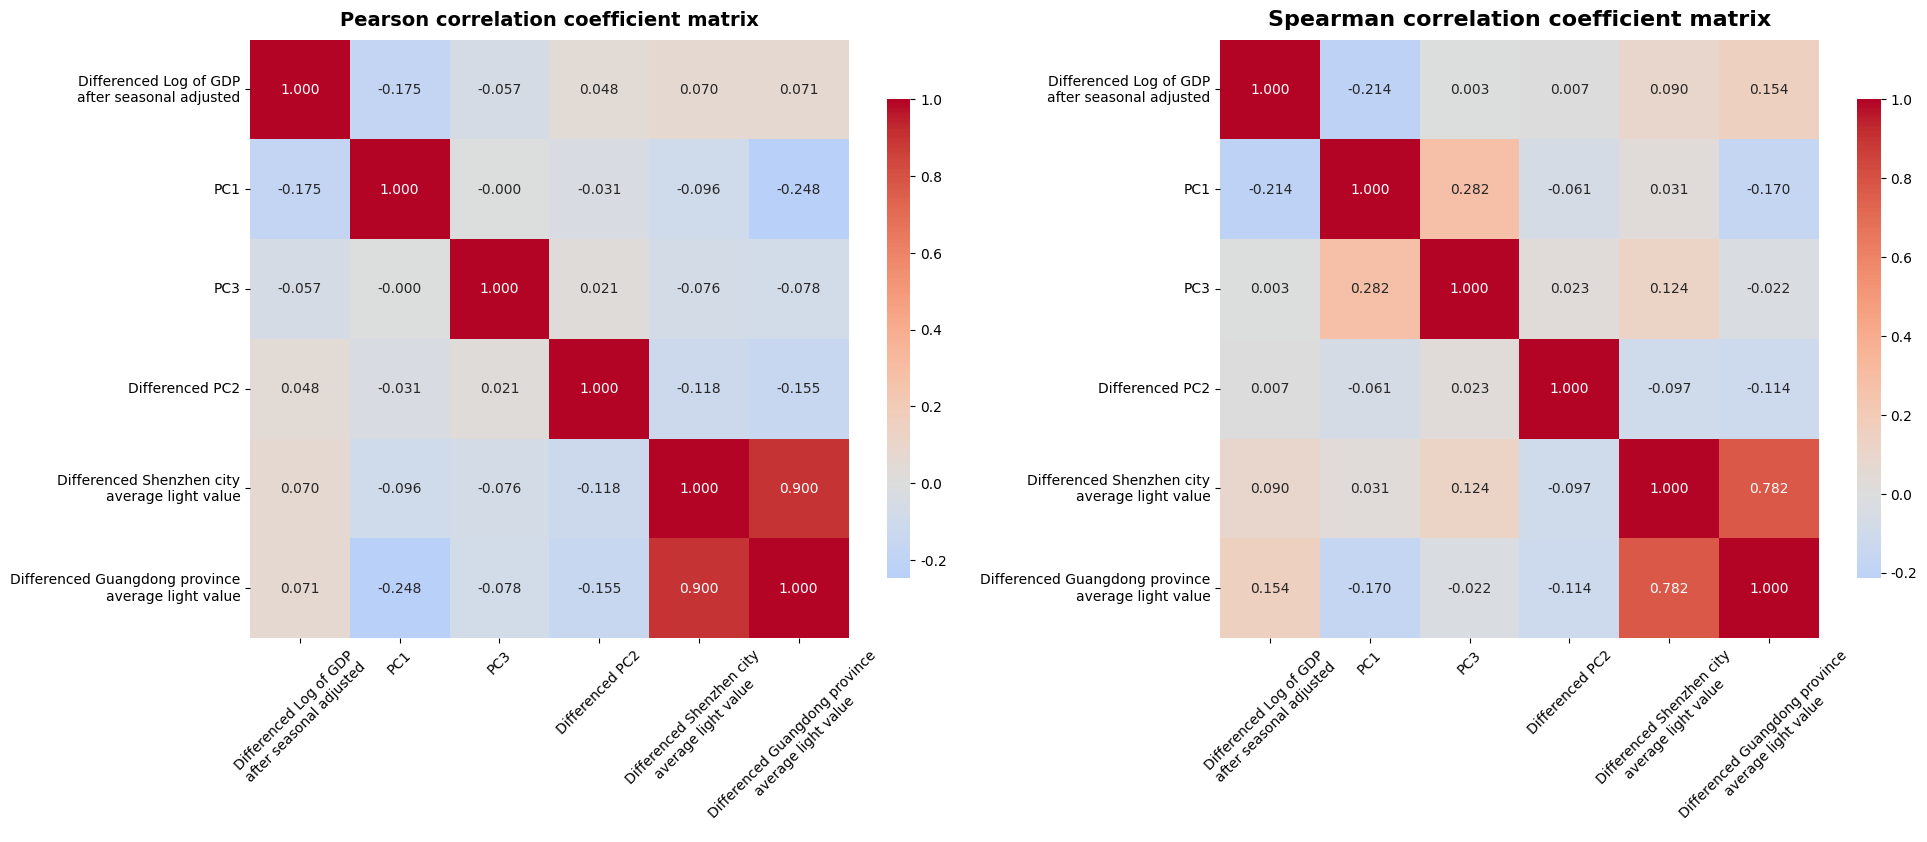

In [12]:
# ÈÄâÊã©Ë¶ÅÂàÜÊûêÁöÑÂèòÈáè
variables = ['dln_gdp_sa', 'pc1', 'pc3', 'dpc2', 'dln_city', 'dln_region']

# ÊèêÂèñÁõ∏ÂÖ≥ÂèòÈáèÁöÑÊï∞ÊçÆ
data_corr = df[variables]

# ËÆ°ÁÆóÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞
pearson_corr = data_corr.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr.round(4))

# ËÆ°ÁÆóÊñØÁöÆÂ∞îÊõºÁõ∏ÂÖ≥Á≥ªÊï∞
spearman_corr = data_corr.corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_corr.round(4))

# ÂàõÂª∫Ëã±ÊñáÂèòÈáèÂêçÊò†Â∞Ñ
variable_names_en = {
    'dln_gdp_sa': 'Differenced Log of GDP\nafter seasonal adjusted',
    'pc1': 'PC1',
    'pc3': 'PC3', 
    'dpc2': 'Differenced PC2',
    'dln_city': 'Differenced Shenzhen city\naverage light value',
    'dln_region': 'Differenced Guangdong province\naverage light value'
}

# ÈáçÂëΩÂêçÁõ∏ÂÖ≥Á≥ªÊï∞Áü©ÈòµÁöÑÁ¥¢ÂºïÂíåÂàóÂêç
pearson_corr_en = pearson_corr.copy()
spearman_corr_en = spearman_corr.copy()

pearson_corr_en.index = [variable_names_en[var] for var in pearson_corr_en.index]
pearson_corr_en.columns = [variable_names_en[var] for var in pearson_corr_en.columns]

spearman_corr_en.index = [variable_names_en[var] for var in spearman_corr_en.index]
spearman_corr_en.columns = [variable_names_en[var] for var in spearman_corr_en.columns]

# ËÆæÁΩÆÂ≠ó‰Ωì‰∏∫ÊîØÊåÅËã±ÊñáÁöÑÂ≠ó‰Ωì
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# ÂèØËßÜÂåñ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# ÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞ÁÉ≠ÂäõÂõæ
sns.heatmap(pearson_corr_en, annot=True, cmap='coolwarm', center=0, ax=ax1, 
            fmt='.3f', square=True, cbar_kws={'shrink': 0.8})
ax1.set_title('Pearson correlation coefficient matrix', fontsize=14, fontweight='bold', pad=10)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.tick_params(axis='y', rotation=0, labelsize=10)

# ÊñØÁöÆÂ∞îÊõºÁõ∏ÂÖ≥Á≥ªÊï∞ÁÉ≠ÂäõÂõæ
sns.heatmap(spearman_corr_en, annot=True, cmap='coolwarm', center=0, ax=ax2,
            fmt='.3f', square=True, cbar_kws={'shrink': 0.8})
ax2.set_title('Spearman correlation coefficient matrix', fontsize=16, fontweight='bold', pad=10)
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.tick_params(axis='y', rotation=0, labelsize=10)

plt.tight_layout()
plt.show()

## Áõ∏ÂÖ≥ÊÄßÂàÜÊûêÁªìÊûúËß£ËØª

### ‰∏ªË¶ÅÂèëÁé∞Ôºö

1. **Âº∫Áõ∏ÂÖ≥ÂÖ≥Á≥ª**Ôºö
   - `dln_city` ‰∏é `dln_region` Áõ∏ÂÖ≥ÊÄßÊúÄÂº∫ÔºàÁöÆÂ∞îÈÄä0.91ÔºåÊñØÁöÆÂ∞îÊõº0.84Ôºâ
   - Á¨¶ÂêàÁªèÊµéÁêÜËÆ∫ÔºöÂüéÂ∏ÇÂåñËøõÁ®ã‰∏éÂå∫ÂüüÂèëÂ±ïÈ´òÂ∫¶Áõ∏ÂÖ≥

2. **Âº±Áõ∏ÂÖ≥ÂÖ≥Á≥ª**Ôºö
   - ÂÖ∂‰ªñÂèòÈáèÈó¥Áõ∏ÂÖ≥ÊÄßÊôÆÈÅçËæÉ‰ΩéÔºà|r| < 0.3Ôºâ
   - ËØ¥ÊòéÂèòÈáèÈó¥Áõ∏ÂØπÁã¨Á´ãÔºåËøôÊúâÂà©‰∫éÂõûÂΩíÂàÜÊûêÊó∂ÈÅøÂÖçÂ§öÈáçÂÖ±Á∫øÊÄß

3. **ÊñØÁöÆÂ∞îÊõºÁõ∏ÂÖ≥Á≥ªÊï∞Áõ∏ÂØπËæÉÈ´ò**Ôºö
   - Ë°®ÊòéÂèòÈáèÈó¥ÂèØËÉΩÂ≠òÂú®ÈùûÁ∫øÊÄßÂçïË∞ÉÂÖ≥Á≥ª
   - Âú®Êó∂Èó¥Â∫èÂàóÂàÜÊûê‰∏≠ÔºåËøôÊèêÁ§∫Êàë‰ª¨ÂèØËÉΩÈúÄË¶ÅËÄÉËôëÈùûÁ∫øÊÄßËΩ¨Êç¢ÊàñÊªûÂêéÊïàÂ∫î

4. **ÂØπÂª∫Ê®°ÁöÑÂêØÁ§∫**Ôºö
   - `dln_city` Âíå `dln_region` ÂèØËÉΩÂ≠òÂú®Â§öÈáçÂÖ±Á∫øÊÄßÔºåÂª∫Ê®°Êó∂ÈúÄË¶ÅÊ≥®ÊÑè
   - ÂÖ∂‰ªñÂèòÈáèÁõ∏ÂÖ≥ÊÄßËæÉ‰ΩéÔºåÈÄÇÂêà‰Ωú‰∏∫Áã¨Á´ãÁöÑËß£ÈáäÂèòÈáè


ÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞ÔºöÊµãÈáèÁ∫øÊÄßÂÖ≥Á≥ªÁöÑÂº∫Â∫¶

ÊñØÁöÆÂ∞îÊõºÁõ∏ÂÖ≥Á≥ªÊï∞ÔºöÊµãÈáèÂçïË∞ÉÂÖ≥Á≥ªÁöÑÂº∫Â∫¶--‰∏ç‰∏ÄÂÆöÊòØÁ∫øÊÄß


ÁöÆÂ∞îÈÄäÔºöÂØπÂºÇÂ∏∏ÂÄºÊïèÊÑüÔºå‰∏Ä‰∏™ÊûÅÁ´ØÂÄºÂèØËÉΩÊòæËëóÂΩ±ÂìçÁõ∏ÂÖ≥Á≥ªÊï∞

ÊñØÁöÆÂ∞îÊõºÔºöÂü∫‰∫éÊéíÂ∫èÔºåÂØπÂºÇÂ∏∏ÂÄºÊõ¥Á®≥ÂÅ•


ÁöÆÂ∞îÈÄäÔºöÂÅáËÆæÊï∞ÊçÆÊúç‰ªéÊ≠£ÊÄÅÂàÜÂ∏É

ÊñØÁöÆÂ∞îÊõºÔºö‰∏ç‰æùËµñ‰∫éÁâπÂÆöÁöÑÊï∞ÊçÆÂàÜÂ∏É

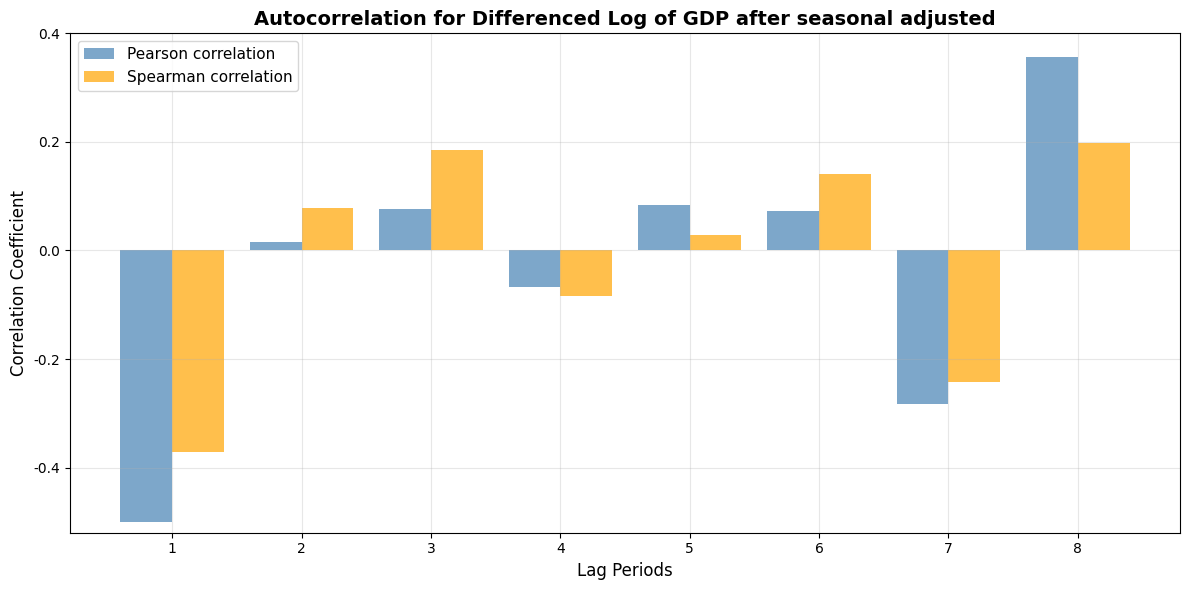

In [15]:
# Autocorrelation analysis for Differenced Log of GDP after seasonal adjusted (Pearson vs Spearman)
lags = range(1, 9)
pearson_auto = [df['dln_gdp_sa'].corr(df['dln_gdp_sa'].shift(lag)) for lag in lags]
spearman_auto = [df['dln_gdp_sa'].corr(df['dln_gdp_sa'].shift(lag), method='spearman') for lag in lags]

# Set English font
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
plt.bar([x-0.2 for x in lags], pearson_auto, width=0.4, label='Pearson correlation', alpha=0.7, color='steelblue')
plt.bar([x+0.2 for x in lags], spearman_auto, width=0.4, label='Spearman correlation', alpha=0.7, color='orange')
plt.xlabel('Lag Periods', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.title('Autocorrelation for Differenced Log of GDP after seasonal adjusted', fontsize=14, fontweight='bold')
plt.ylim(-0.52, 0.4)  # Unified scale
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

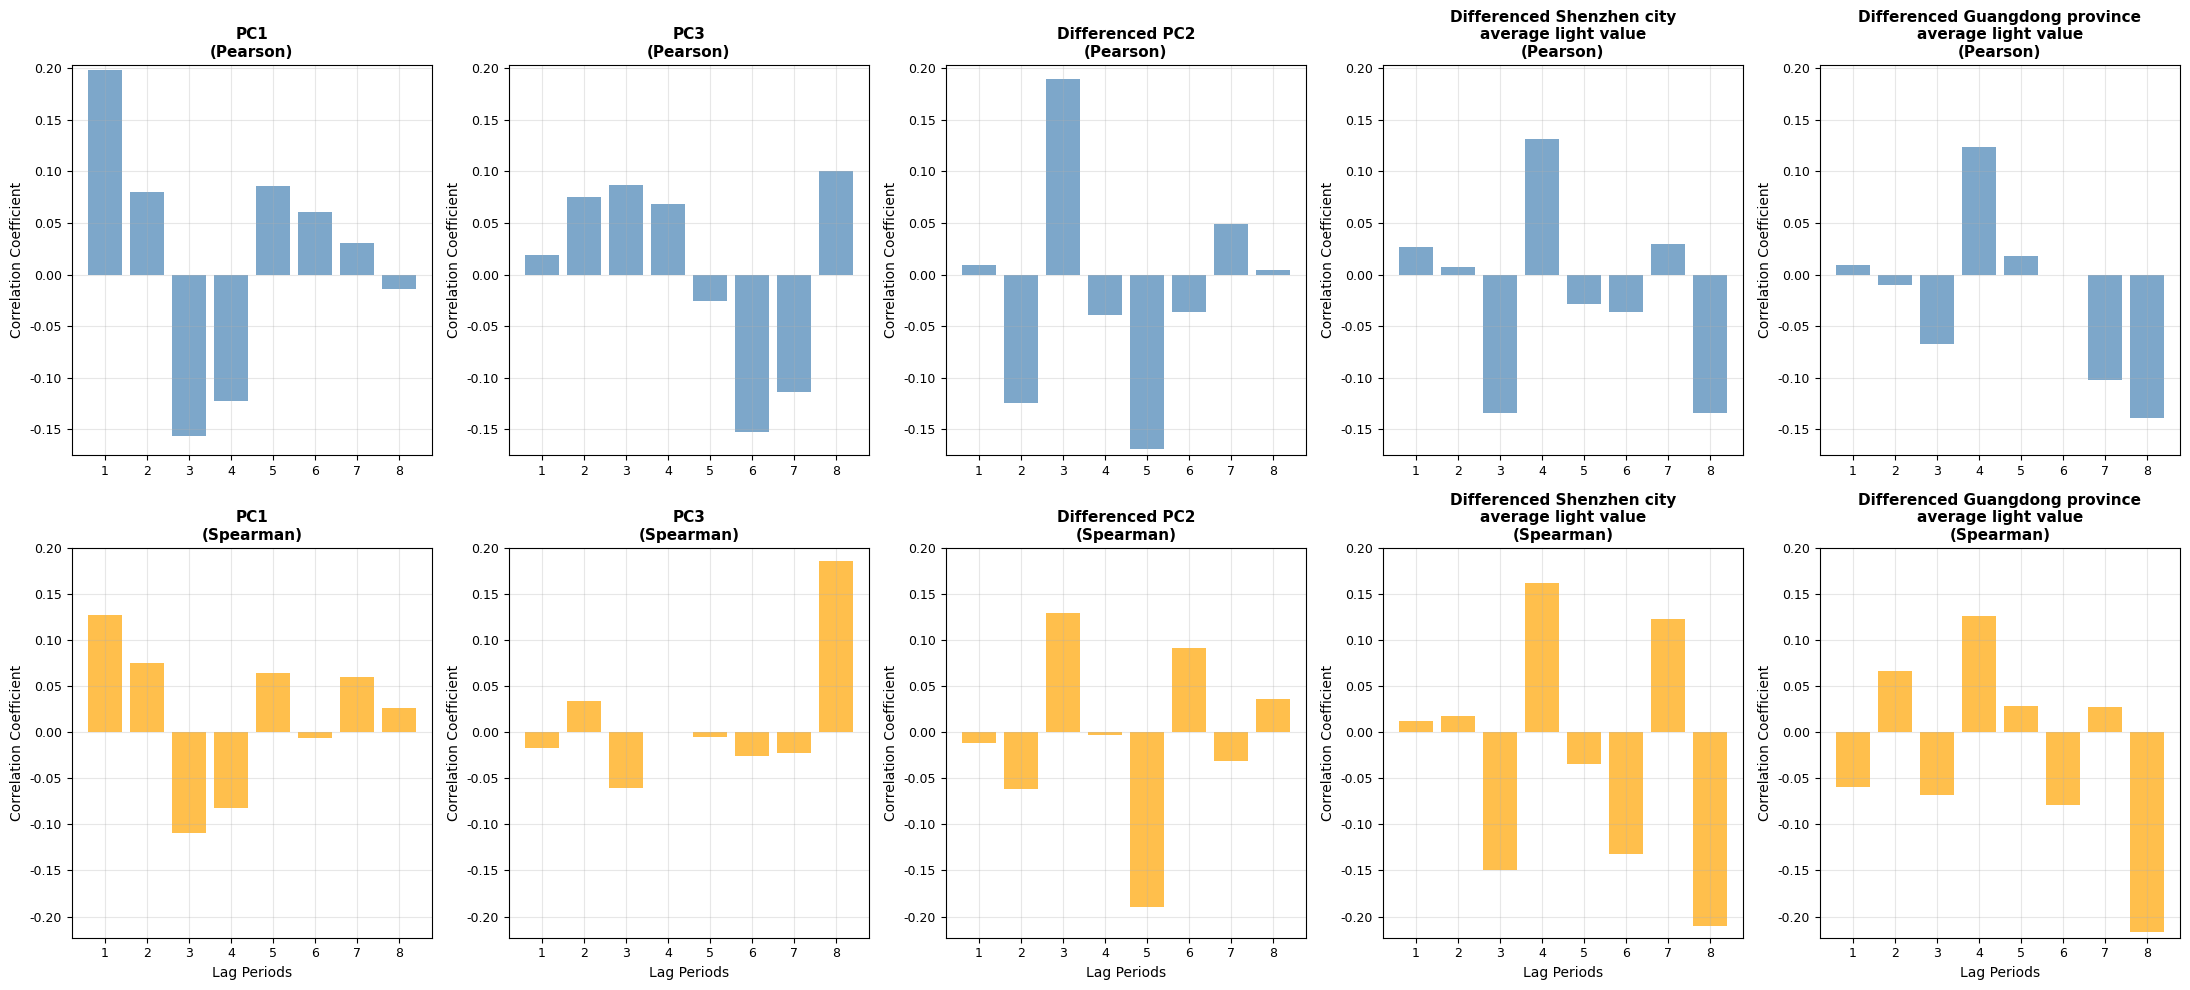

In [36]:
# Lag correlation analysis (quarterly data, analyzing 1-8 period lags)
target_var = 'dln_gdp_sa'
exog_vars = ['pc1', 'pc3', 'dpc2', 'dln_city', 'dln_region']
max_lags = 8

# Variable name mapping for English display
var_names_en = {
    'pc1': 'PC1',
    'pc3': 'PC3', 
    'dpc2': 'Differenced PC2',
    'dln_city': 'Differenced Shenzhen city\naverage light value',
    'dln_region': 'Differenced Guangdong province\naverage light value'
}
target_name_en = 'Differenced Log of GDP\nafter seasonal adjusted'

# Calculate Pearson lag correlations
lag_correlations = {}
for var in exog_vars:
    correlations = []
    for lag in range(1, max_lags + 1):
        corr = df[var].shift(lag).corr(df[target_var])
        correlations.append(corr)
    lag_correlations[var] = correlations

# Calculate Spearman lag correlations
lag_correlations_spearman = {}
for var in exog_vars:
    correlations = []
    for lag in range(1, max_lags + 1):
        corr = df[var].shift(lag).corr(df[target_var], method='spearman')
        correlations.append(corr)
    lag_correlations_spearman[var] = correlations

# Set English font
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# Comparison visualization (Pearson vs Spearman)
fig, axes = plt.subplots(2, 5, figsize=(22, 10))
for i, var in enumerate(exog_vars):
    var_display_name = var_names_en[var]
    
    # Pearson correlation coefficients
    axes[0, i].bar(range(1, max_lags + 1), lag_correlations[var], alpha=0.7, color='steelblue')
    axes[0, i].set_title(f'{var_display_name}\n(Pearson)', fontsize=11, fontweight='bold')
    axes[0, i].set_ylabel('Correlation Coefficient', fontsize=10)
    axes[0, i].set_ylim(-0.175, 0.203)  # Unified scale
    axes[0, i].grid(True, alpha=0.3)
    axes[0, i].tick_params(labelsize=9)
    
    # Spearman correlation coefficients
    axes[1, i].bar(range(1, max_lags + 1), lag_correlations_spearman[var], alpha=0.7, color='orange')
    axes[1, i].set_title(f'{var_display_name}\n(Spearman)', fontsize=11, fontweight='bold')
    axes[1, i].set_xlabel('Lag Periods', fontsize=10)
    axes[1, i].set_ylabel('Correlation Coefficient', fontsize=10)
    axes[1, i].set_ylim(-0.223, 0.2)  # Unified scale
    axes[1, i].grid(True, alpha=0.3)
    axes[1, i].tick_params(labelsize=9)

plt.tight_layout()
plt.show()

pc3ÂèØËÉΩÁî®‰∫Ü‰∏Ä‰∫õÂØπÁªèÊµéÂΩ±ÂìçËæÉÊÖ¢ÁöÑÁâπÂæÅÔºõ
Âº∫Á∫øÊÄßÂÖ≥Á≥ªÊó∂ÔºåÁöÆÂ∞îÈÄäÁ≥ªÊï∞‰ºöÊØîÊñØÁöÆÂ∞îÊõºÁ≥ªÊï∞È´òÔºåÂ¶ÇÂú®PCsÁöÑË°®Áé∞‰∏ä

## CCF ‰∫§ÂèâÁõ∏ÂÖ≥ÂáΩÊï∞

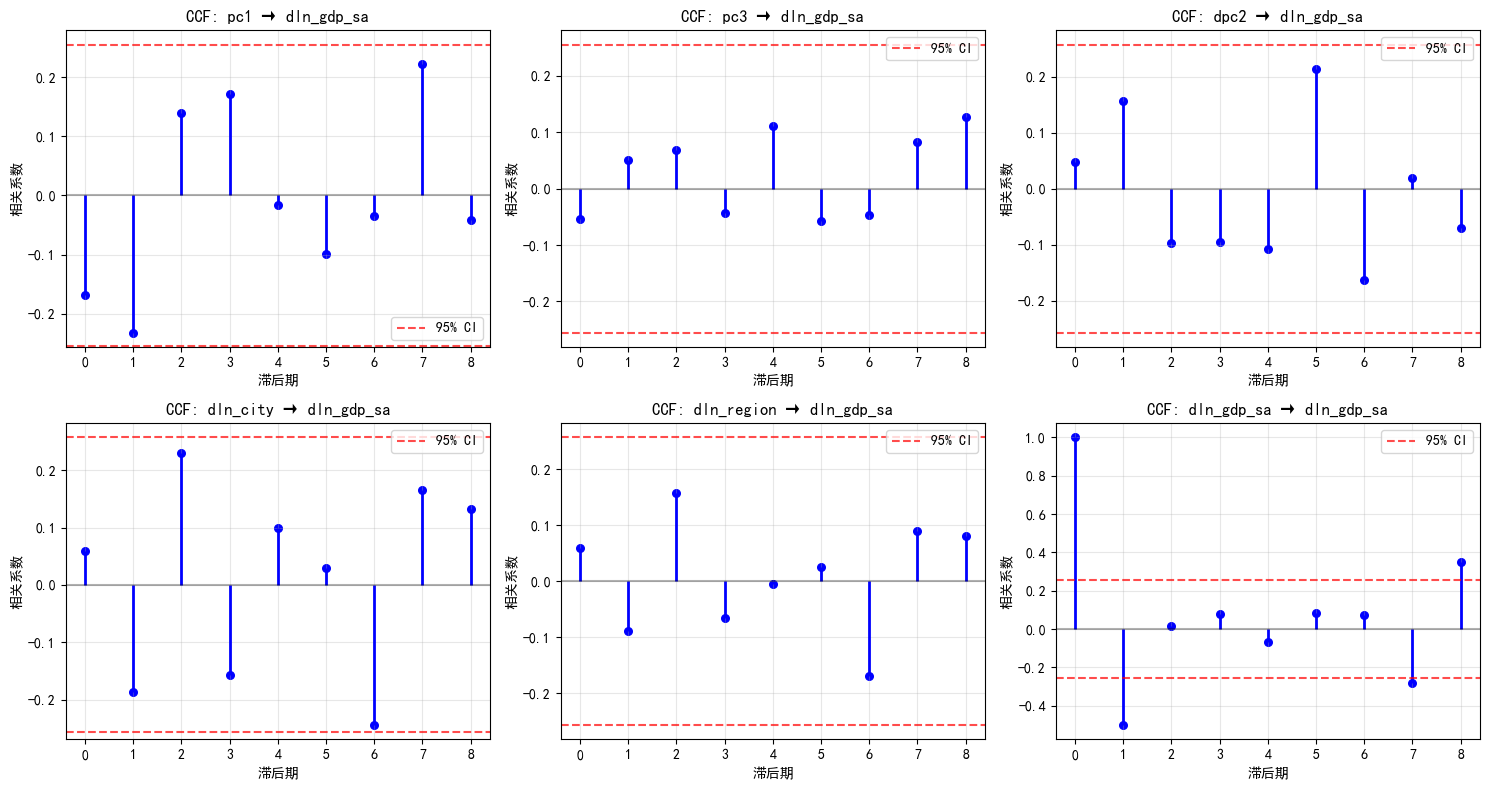

In [11]:
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt
import numpy as np

# ÂèòÈáèÂÆö‰πâ
target_var = 'dln_gdp_sa'
exog_vars = ['pc1', 'pc3', 'dpc2', 'dln_city', 'dln_region']
all_vars = exog_vars + [target_var]  # ÂåÖÂê´Ëá™Áõ∏ÂÖ≥

# ÂàõÂª∫Â≠êÂõæ
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# ËÆ°ÁÆóÂπ∂ÁªòÂà∂CCF
for i, var in enumerate(all_vars):
    ccf_values = ccf(df[var].dropna(), df[target_var].dropna(), adjusted=False)[:9]  # 0Âà∞8ÊªûÂêé
    lags = range(9)
    
    # ÁªòÂà∂Á´ñÁ∫øÂõæÔºàÁ±ª‰ººACF/PACFÔºâ
    axes[i].vlines(lags, 0, ccf_values, colors='blue', linewidth=2)
    axes[i].scatter(lags, ccf_values, color='blue', s=30)
    axes[i].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    # 95%ÁΩÆ‰ø°Âå∫Èó¥ (¬±1.96/‚àön)
    n = len(df[var].dropna())
    ci = 1.96 / np.sqrt(n)
    axes[i].axhline(y=ci, color='r', linestyle='--', alpha=0.7, label='95% CI')
    axes[i].axhline(y=-ci, color='r', linestyle='--', alpha=0.7)
    axes[i].set_title(f'CCF: {var} ‚Üí {target_var}')
    axes[i].set_xlabel('ÊªûÂêéÊúü'); axes[i].set_ylabel('Áõ∏ÂÖ≥Á≥ªÊï∞')
    axes[i].grid(True, alpha=0.3); axes[i].legend()

plt.tight_layout(); plt.show()


### ACF/PACF

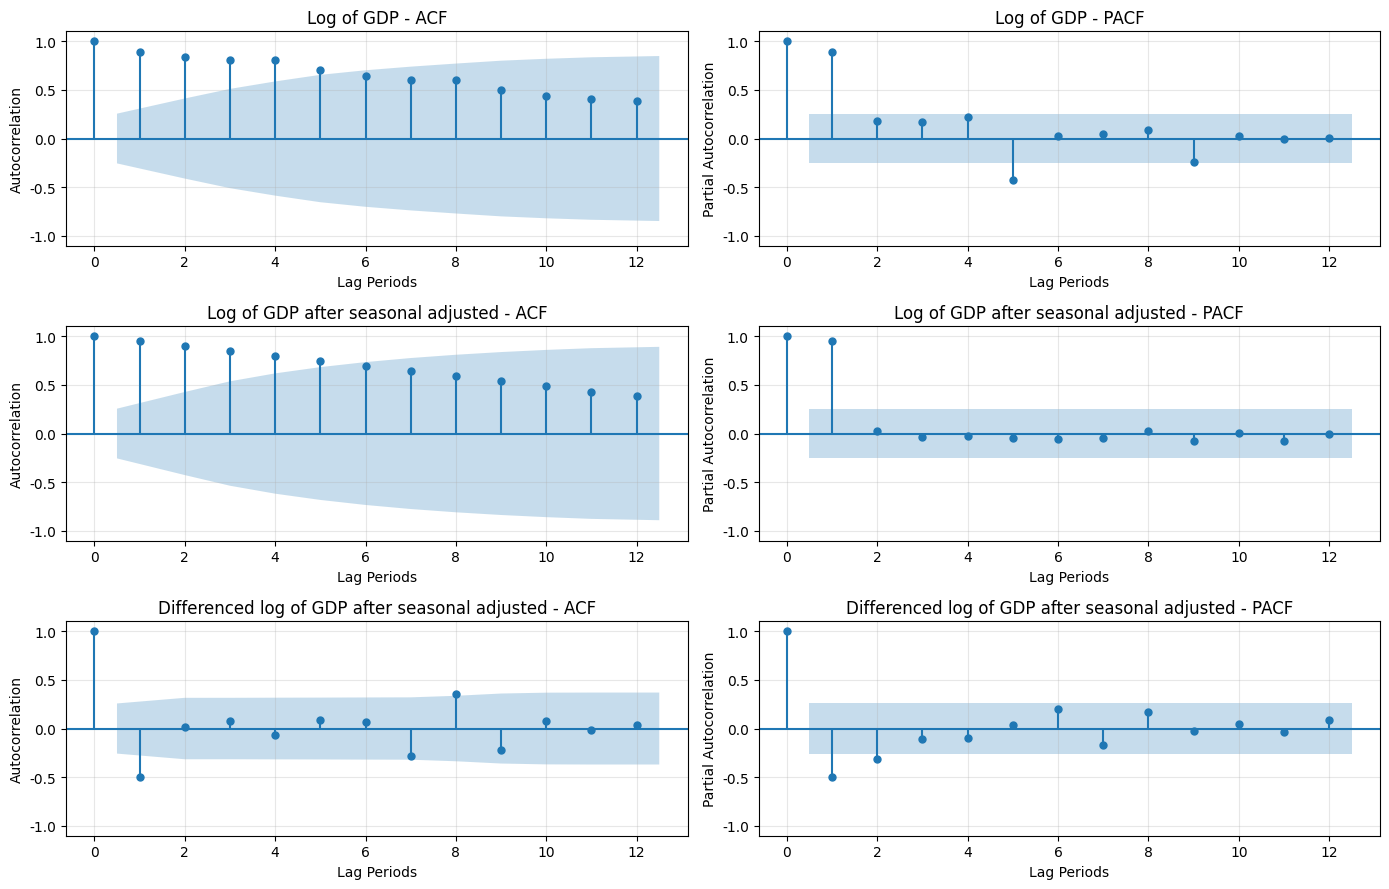

In [40]:
# ACF and PACF Analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Select variables for analysis
variables = ['ln_gdp', 'ln_gdp_sa', 'dln_gdp_sa']

# Variable name mapping for English display
var_names_acf = {
    'ln_gdp': 'Log of GDP',
    'ln_gdp_sa': 'Log of GDP after seasonal adjusted',
    'dln_gdp_sa': 'Differenced log of GDP after seasonal adjusted'
}

# Set English font
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# Create subplots
fig, axes = plt.subplots(len(variables), 2, figsize=(14, 3*len(variables)))

# Plot ACF and PACF for each variable
for i, var in enumerate(variables):
    var_display_name = var_names_acf[var]
    
    # ACF
    plot_acf(df[var].dropna(), ax=axes[i, 0], lags=12, title=f'{var_display_name} - ACF')
    axes[i, 0].set_ylim(-1.1, 1.1)  # Adjust ACF y-axis range
    axes[i, 0].set_xlabel('Lag Periods')
    axes[i, 0].set_ylabel('Autocorrelation')
    axes[i, 0].grid(True, alpha=0.3)
    
    # PACF
    plot_pacf(df[var].dropna(), ax=axes[i, 1], lags=12, title=f'{var_display_name} - PACF')
    axes[i, 1].set_ylim(-1.1, 1.1)  # Adjust PACF y-axis range
    axes[i, 1].set_xlabel('Lag Periods')
    axes[i, 1].set_ylabel('Partial Autocorrelation')
    axes[i, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**PACF vs Ëá™Áõ∏ÂÖ≥Á≥ªÊï∞ÁöÑÂ∑ÆÂºÇËß£ÈáäÔºö**

1. **PACFÊòæÁ§∫AR(3)**ÔºöÂú®ÊéßÂà∂‰∫Ülag1„ÄÅlag2ÂêéÔºåÂÖ∂‰ªñÊªûÂêéÊúüÁöÑÁõ¥Êé•ÂΩ±Âìç‰∏çÊòæËëó
2. **Ëá™Áõ∏ÂÖ≥Á≥ªÊï∞lag7„ÄÅlag8È´ò**ÔºöËøôÊòØÈÄöËøáAR(2)ËøáÁ®ãÁöÑÈó¥Êé•‰º†ÂØºÊïàÂ∫î‰∫ßÁîüÁöÑ

**ÂèØËÉΩÁöÑÊï∞ÊçÆÁîüÊàêËøáÁ®ãÔºö**
- Áü≠ÊúüÔºöAR(3)Âä®ÊÄÅ 
- ÈïøÊúüÔºöÈÄöËøáAR(3)ÁöÑÁ¥ØÁßØÊïàÂ∫î‰º†ÂØºÂà∞lag7„ÄÅlag8
- Â≠£ËäÇÊÄßÔºölag8(2Âπ¥)ÂèØËÉΩÂèçÊò†ÂïÜ‰∏öÂë®ÊúüÁ≠âÈïøÊúüÁªèÊµéÊ®°Âºè

**Âª∫Ê®°ÂêØÁ§∫Ôºö**
- ËÄÉËôëAR(3)‰Ωú‰∏∫Âü∫Á°ÄÊ®°Âûã
- ÂèØËÉΩÈúÄË¶ÅÂä†ÂÖ•Â≠£ËäÇÊÄßÊàêÂàÜÂ§ÑÁêÜlag8ÁöÑÂë®ÊúüÊÄß
- ÊàñËÄÉËôëARMAÊ®°ÂûãÊçïÊçâÊõ¥Â§çÊùÇÁöÑÂä®ÊÄÅÁªìÊûÑ

Â∫èÂàóÂ≠òÂú®ÊòæËëóÁöÑËá™Áõ∏ÂÖ≥ÁªìÊûÑÔºõACFÁöÑlag1ÊòæËëóÔºöËØ¥ÊòéÁõ∏ÈÇªÊúüÈó¥Â≠òÂú®Ê≠£Áõ∏ÂÖ≥Ôºålag8ÊòæËëóÔºöÂèØËÉΩÂ≠òÂú®ÊüêÁßçÂë®ÊúüÊÄßÊ®°ÂºèÂ¶ÇÂïÜ‰∏öÂë®ÊúüÔºõlag1„ÄÅlag2ÊòæËëóÔºöÊöóÁ§∫ÂèØËÉΩÊòØAR(2)Ê®°ÂûãÁöÑÁâπÂæÅ

# Ê®°Âûã‰º∞ËÆ°

Â§öÈÄâÂá†‰∏™ÂèòÈáèÔºåËÆ©Ê®°ÂûãÂÅöÁúüÂÆûÈ¢ÑÊµãÊó∂ÂèØ‰ª•ÁúãÁúãÂ∞ëÈáèÊï∞ÊçÆÊ®°ÂûãËÆ≠ÁªÉÂá∫ÁöÑÊ®°ÂûãË°®Áé∞ÊÄé‰πàÊ†∑

In [6]:
# ÁÆÄÂçïARIMAXÂâçÂêëÈÄêÊ≠•ÈÄâÊã©Ê®°Âûã
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# 1. Êï∞ÊçÆÂáÜÂ§á
target = 'dln_gdp_sa'
base_vars = ['pc1', 'pc3', 'dpc2', 'dln_city', 'dln_region']
max_lag = 4

# ÂàõÂª∫ÊªûÂêéÂèòÈáè
data = df.copy()
candidates = []

for var in base_vars + [target]:
    for lag in range(1, max_lag + 1):
        lag_name = f'{var}_lag{lag}'
        data[lag_name] = df[var].shift(lag)
        candidates.append(lag_name)

print(f"ÂÄôÈÄâÂèòÈáèÊï∞: {len(candidates)}")
print(f"ÂéüÂßãÊï∞ÊçÆ: {data.shape}")

# Â§ÑÁêÜÁº∫Â§±ÂÄº - Âà†Èô§ÂåÖÂê´Áº∫Â§±ÂÄºÁöÑË°å
data_clean = data.dropna()
print(f"Ê∏ÖÁêÜÂêéÊï∞ÊçÆ: {data_clean.shape}")
print(f"Âà†Èô§‰∫Ü {data.shape[0] - data_clean.shape[0]} Ë°åÁº∫Â§±ÂÄº")

# 2. ÊªöÂä®Á™óÂè£È¢ÑÊµãÂáΩÊï∞ - ÊØè‰∏™Á™óÂè£ÂçïÁã¨ËÆ°ÁÆóMSEÁÑ∂ÂêéÂπ≥Âùá
def rolling_arimax_avg_mse(y, X=None, window=40, steps=5):
    """ÊªöÂä®Á™óÂè£ARIMAXÈ¢ÑÊµãÔºåËøîÂõûÊØè‰∏™Á™óÂè£MSEÁöÑÂπ≥ÂùáÂÄº"""
    mse_list = []
    
    for i in range(window, len(y) - steps + 1):
        try:
            # ËÆ≠ÁªÉÊï∞ÊçÆ
            y_train = y[i-window:i]
            X_train = X[i-window:i] if X is not None else None
            
            # ÊµãËØïÊï∞ÊçÆ
            y_test = y[i:i+steps]
            X_test = X[i:i+steps] if X is not None else None
            
            # ÊãüÂêàARIMAX(3,0,0)
            model = ARIMA(y_train, exog=X_train, order=(3,0,0))
            fitted = model.fit()
            
            # È¢ÑÊµã
            pred = fitted.forecast(steps=steps, exog=X_test)
            
            # ËÆ°ÁÆóÂΩìÂâçÁ™óÂè£ÁöÑMSE
            window_mse = mean_squared_error(y_test, pred)
            mse_list.append(window_mse)
        except:
            continue
    
    # ËøîÂõûÂπ≥ÂùáMSE
    return np.mean(mse_list) if mse_list else float('inf')

# 2b. ÊªöÂä®Á™óÂè£È¢ÑÊµãÂáΩÊï∞ - Áî®‰∫éÊúÄÁªàËØÑ‰º∞ÔºàËøîÂõûÈ¢ÑÊµãÂÄºÔºâ
def rolling_arimax_predict(y, X=None, window=40, steps=5):
    """ÊªöÂä®Á™óÂè£ARIMAXÈ¢ÑÊµãÔºåËøîÂõûÈ¢ÑÊµãÂÄºÂíåÂÆûÈôÖÂÄº"""
    preds, actuals = [], []
    
    for i in range(window, len(y) - steps + 1):
        try:
            # ËÆ≠ÁªÉÊï∞ÊçÆ
            y_train = y[i-window:i]
            X_train = X[i-window:i] if X is not None else None
            
            # ÊµãËØïÊï∞ÊçÆ
            y_test = y[i:i+steps]
            X_test = X[i:i+steps] if X is not None else None
            
            # ÊãüÂêàARIMAX(3,0,0)
            model = ARIMA(y_train, exog=X_train, order=(3,0,0))
            fitted = model.fit()
            
            # È¢ÑÊµã
            pred = fitted.forecast(steps=steps, exog=X_test)
            preds.extend(pred)
            actuals.extend(y_test)
        except:
            continue
    
    return np.array(preds), np.array(actuals)

ÂÄôÈÄâÂèòÈáèÊï∞: 24
ÂéüÂßãÊï∞ÊçÆ: (59, 41)
Ê∏ÖÁêÜÂêéÊï∞ÊçÆ: (54, 41)
Âà†Èô§‰∫Ü 5 Ë°åÁº∫Â§±ÂÄº


In [7]:
# 3. ÂâçÂêëÈÄêÊ≠•ÈÄâÊã©ÁÆóÊ≥ï - ‰øùÂ≠òÊØè‰∏ÄÊ≠•ÁöÑÊ®°Âûã
def forward_selection_with_models(data, target, candidates, max_vars=7):
    """ÂâçÂêëÈÄêÊ≠•ÈÄâÊã©Ôºå‰øùÂ≠òÊØè‰∏ÄÊ≠•ÁöÑÊ®°Âûã"""
    selected = []
    y = data[target].values
    saved_models = {}  # ‰øùÂ≠òÊØè‰∏ÄÊ≠•ÁöÑÊ®°Âûã‰ø°ÊÅØ
    
    print("\n=== ÂºÄÂßãÂâçÂêëÈÄêÊ≠•ÈÄâÊã© (‰ΩøÁî®Âπ≥ÂùáMSE) ===")
    
    for step in range(max_vars):
        best_avg_mse = float('inf')
        best_var = None
        
        print(f"\nÊ≠•È™§ {step+1}: ÂΩìÂâçÂèòÈáè {selected}")
        
        # ÊµãËØïÊØè‰∏™ÂÄôÈÄâÂèòÈáè
        for var in candidates:
            if var not in selected:
                # ÂΩìÂâçÂèòÈáèÁªÑÂêà
                test_vars = selected + [var]
                X = data[test_vars].values if test_vars else None
                
                # ËÆ°ÁÆóÂπ≥ÂùáMSE
                try:
                    avg_mse = rolling_arimax_avg_mse(y, X)
                    print(f"  {var}: Âπ≥ÂùáMSE = {avg_mse:.6f}")
                    
                    if avg_mse < best_avg_mse:
                        best_avg_mse = avg_mse
                        best_var = var
                except:
                    continue
        
        # Ê∑ªÂä†ÊúÄ‰Ω≥ÂèòÈáèÂπ∂‰øùÂ≠òÊ®°Âûã
        if best_var:
            selected.append(best_var)
            print(f"  ‚úì ÈÄâÊã©: {best_var} (Âπ≥ÂùáMSE: {best_avg_mse:.6f})")
            
            # ‰øùÂ≠òÂΩìÂâçÊ≠•È™§ÁöÑÊ®°Âûã‰ø°ÊÅØ
            model_name = f"ARIMAX_{step+1}ÂèòÈáè"
            saved_models[model_name] = {
                'variables': selected.copy(),
                'mse': best_avg_mse,
                'step': step + 1
            }
        else:
            print("  Êó†ÊîπËøõÂèòÈáèÔºåÂÅúÊ≠¢")
            break
    
    return selected, saved_models

# ÊâßË°åÈÄâÊã©Âπ∂‰øùÂ≠òÊ®°Âûã
print(f"ÂèØÁî®‰∫éËÆ≠ÁªÉÁöÑÊï∞ÊçÆÈáè: {len(data_clean)}")
selected_vars, arimax_models = forward_selection_with_models(data_clean, target, candidates, max_vars=7)

print(f"\n=== ÊúÄÁªàÁªìÊûú ===")
print(f"ÈÄâÊã©ÁöÑÂèòÈáè: {selected_vars}")
print(f"‰øùÂ≠òÁöÑÊ®°ÂûãÊï∞Èáè: {len(arimax_models)}")

# ÊòæÁ§∫‰øùÂ≠òÁöÑÊ®°Âûã
print(f"\n=== ‰øùÂ≠òÁöÑÊ®°ÂûãÂàóË°® ===")
for model_name, model_info in arimax_models.items():
    print(f"{model_name}: {model_info['variables']} (MSE: {model_info['mse']:.6f})")

ÂèØÁî®‰∫éËÆ≠ÁªÉÁöÑÊï∞ÊçÆÈáè: 54

=== ÂºÄÂßãÂâçÂêëÈÄêÊ≠•ÈÄâÊã© (‰ΩøÁî®Âπ≥ÂùáMSE) ===

Ê≠•È™§ 1: ÂΩìÂâçÂèòÈáè []
  pc1_lag1: Âπ≥ÂùáMSE = 0.000579
  pc1_lag2: Âπ≥ÂùáMSE = 0.000656
  pc1_lag3: Âπ≥ÂùáMSE = 0.000709
  pc1_lag4: Âπ≥ÂùáMSE = 0.000646
  pc3_lag1: Âπ≥ÂùáMSE = 0.000840
  pc3_lag2: Âπ≥ÂùáMSE = 0.000885
  pc3_lag3: Âπ≥ÂùáMSE = 0.000654
  pc3_lag4: Âπ≥ÂùáMSE = 0.000502
  dpc2_lag1: Âπ≥ÂùáMSE = 0.000836
  dpc2_lag2: Âπ≥ÂùáMSE = 0.000687
  dpc2_lag3: Âπ≥ÂùáMSE = 0.000571
  dpc2_lag4: Âπ≥ÂùáMSE = 0.000619
  dln_city_lag1: Âπ≥ÂùáMSE = 0.000829
  dln_city_lag2: Âπ≥ÂùáMSE = 0.001246
  dln_city_lag3: Âπ≥ÂùáMSE = 0.002488
  dln_city_lag4: Âπ≥ÂùáMSE = 0.001209
  dln_region_lag1: Âπ≥ÂùáMSE = 0.000810
  dln_region_lag2: Âπ≥ÂùáMSE = 0.000729
  dln_region_lag3: Âπ≥ÂùáMSE = 0.000807
  dln_region_lag4: Âπ≥ÂùáMSE = 0.001176
  dln_gdp_sa_lag1: Âπ≥ÂùáMSE = 0.000557
  dln_gdp_sa_lag2: Âπ≥ÂùáMSE = 0.000637
  dln_gdp_sa_lag3: Âπ≥ÂùáMSE = 0.000633
  dln_gdp_sa_lag4: Âπ≥ÂùáMSE = 0.000559
  ‚úì ÈÄâÊã©: pc3

In [8]:
# 4. ÊâÄÊúâÊ®°ÂûãÊÄßËÉΩÂØπÊØî - ‰∏çÊòæÁ§∫ÂõæË°®
if arimax_models:
    y_final = data_clean[target].values
    
    # ËÆ°ÁÆóÂü∫ÂáÜAR(2)Ê®°ÂûãÁöÑMSE
    baseline_mse = rolling_arimax_avg_mse(y_final, None)
    
    print(f"\n" + "="*80)
    print("ÊâÄÊúâARIMAXÊ®°Âûã vs AR(3)Âü∫ÂáÜÊ®°Âûã MSEÂØπÊØî")
    print("="*80)
    print(f"{'Ê®°ÂûãÂêçÁß∞':<15} {'ÂèòÈáèÊï∞':<8} {'MSE':<12} {'Âü∫ÂáÜMSE':<12} {'ÊîπËøõ%':<10} {'ÈÄâÊã©ÁöÑÂèòÈáè'}")
    print("-"*80)
    
    # ËæìÂá∫Âü∫ÂáÜÊ®°Âûã
    print(f"{'AR(3)Âü∫ÂáÜ':<15} {'0':<8} {baseline_mse:<12.6f} {'-':<12} {'-':<10} {'Êó†Â§ñÁîüÂèòÈáè'}")
    print("-"*80)
    
    # ËæìÂá∫ÊØè‰∏™ARIMAXÊ®°Âûã
    for model_name, model_info in arimax_models.items():
        mse = model_info['mse']
        improvement = (baseline_mse - mse) / baseline_mse * 100
        variables_str = ', '.join(model_info['variables'])
        
        print(f"{model_name:<15} {model_info['step']:<8} {mse:<12.6f} {baseline_mse:<12.6f} {improvement:<10.2f} {variables_str}")
    
    print("="*80)
    
    # ÊâæÂá∫ÊúÄ‰Ω≥Ê®°Âûã
    best_model = min(arimax_models.items(), key=lambda x: x[1]['mse'])
    best_improvement = (baseline_mse - best_model[1]['mse']) / baseline_mse * 100
    
    print(f"\nÊúÄ‰Ω≥Ê®°Âûã: {best_model[0]}")
    print(f"ÊúÄ‰Ω≥MSE: {best_model[1]['mse']:.6f}")
    print(f"Áõ∏ÂØπAR(3)ÊîπËøõ: {best_improvement:.2f}%")
    print(f"ÊúÄ‰Ω≥ÂèòÈáèÁªÑÂêà: {best_model[1]['variables']}")
    
    # ‰øùÂ≠òÊ®°Âûã‰ø°ÊÅØÂà∞ÂèòÈáè
    globals()['arimax_models_summary'] = arimax_models
    globals()['baseline_ar3_mse'] = baseline_mse
    globals()['best_arimax_model'] = best_model
    
    print(f"\nÊ®°ÂûãÂ∑≤‰øùÂ≠òÂà∞ÂèòÈáè:")
    print(f"- arimax_models_summary: ÊâÄÊúâARIMAXÊ®°Âûã‰ø°ÊÅØ")
    print(f"- baseline_ar3_mse: AR(3)Âü∫ÂáÜÊ®°ÂûãMSE")
    print(f"- best_arimax_model: ÊúÄ‰Ω≥ARIMAXÊ®°Âûã‰ø°ÊÅØ")
    
else:
    print("Êú™ÁîüÊàêARIMAXÊ®°Âûã")


ÊâÄÊúâARIMAXÊ®°Âûã vs AR(3)Âü∫ÂáÜÊ®°Âûã MSEÂØπÊØî
Ê®°ÂûãÂêçÁß∞            ÂèòÈáèÊï∞      MSE          Âü∫ÂáÜMSE        ÊîπËøõ%        ÈÄâÊã©ÁöÑÂèòÈáè
--------------------------------------------------------------------------------
AR(3)Âü∫ÂáÜ         0        0.000647     -            -          Êó†Â§ñÁîüÂèòÈáè
--------------------------------------------------------------------------------
ARIMAX_1ÂèòÈáè      1        0.000502     0.000647     22.35      pc3_lag4
ARIMAX_2ÂèòÈáè      2        0.000372     0.000647     42.48      pc3_lag4, dln_gdp_sa_lag1
ARIMAX_3ÂèòÈáè      3        0.000348     0.000647     46.21      pc3_lag4, dln_gdp_sa_lag1, dln_gdp_sa_lag4
ARIMAX_4ÂèòÈáè      4        0.000329     0.000647     49.19      pc3_lag4, dln_gdp_sa_lag1, dln_gdp_sa_lag4, dpc2_lag4
ARIMAX_5ÂèòÈáè      5        0.000330     0.000647     49.06      pc3_lag4, dln_gdp_sa_lag1, dln_gdp_sa_lag4, dpc2_lag4, dln_region_lag3
ARIMAX_6ÂèòÈáè      6        0.000347     0.000647     46.29      pc3_la

In [10]:
# ‰øùÂ≠òMSEÂØπÊØîË°®Ê†ºÂà∞Excel - Áã¨Á´ã‰ª£Á†ÅÂçïÂÖÉÊ†º
def save_mse_comparison_table(arimax_models, baseline_mse):
    """‰øùÂ≠òARIMAX vs AR(3)Âü∫ÂáÜÊ®°ÂûãÁöÑMSEÂØπÊØîË°®Ê†º"""
    print("=== ‰øùÂ≠òMSEÂØπÊØîË°®Ê†ºÂà∞Excel ===")
    
    # Ê£ÄÊü•ÊòØÂê¶ÊúâÊ®°ÂûãÊï∞ÊçÆ
    if not arimax_models:
        print("‚ùå ÈîôËØØÔºöÊú™ÊâæÂà∞ARIMAXÊ®°ÂûãÊï∞ÊçÆ")
        return None
    
    # ÂàõÂª∫ÂØπÊØîË°®Ê†ºÊï∞ÊçÆ
    comparison_data = []
    
    # Ê∑ªÂä†AR(3)Âü∫ÂáÜÊ®°Âûã
    comparison_data.append({
        'Ê®°ÂûãÂêçÁß∞': 'AR(3)Âü∫ÂáÜ',
        'ÂèòÈáèÊï∞': 0,
        'MSE': baseline_mse,
        'Âü∫ÂáÜMSE': baseline_mse,
        'ÊîπËøõ%': 0.0,
        'ÈÄâÊã©ÁöÑÂèòÈáè': 'Êó†Â§ñÁîüÂèòÈáè'
    })
    
    # Ê∑ªÂä†ÂêÑ‰∏™ARIMAXÊ®°Âûã
    for model_name, model_info in arimax_models.items():
        mse = model_info['mse']
        improvement = (baseline_mse - mse) / baseline_mse * 100
        variables_str = ', '.join(model_info['variables'])
        
        comparison_data.append({
            'Ê®°ÂûãÂêçÁß∞': model_name,
            'ÂèòÈáèÊï∞': model_info['step'],
            'MSE': mse,
            'Âü∫ÂáÜMSE': baseline_mse,
            'ÊîπËøõ%': improvement,
            'ÈÄâÊã©ÁöÑÂèòÈáè': variables_str
        })
    
    # ÂàõÂª∫DataFrame
    comparison_df = pd.DataFrame(comparison_data)
    
    # ‰øùÂ≠òÂà∞Excel
    save_dir = r"D:\S_data\models"
    os.makedirs(save_dir, exist_ok=True)
    comparison_excel_path = os.path.join(save_dir, 'ARIMAX_selected.xlsx')
    
    try:
        with pd.ExcelWriter(comparison_excel_path, engine='openpyxl') as writer:
            comparison_df.to_excel(writer, sheet_name='MSEÂØπÊØî', index=False)
            
            # Ë∞ÉÊï¥ÂàóÂÆΩ
            worksheet = writer.sheets['MSEÂØπÊØî']
            column_widths = {
                'A': 18,  # Ê®°ÂûãÂêçÁß∞
                'B': 10,  # ÂèòÈáèÊï∞
                'C': 12,  # MSE
                'D': 12,  # Âü∫ÂáÜMSE
                'E': 10,  # ÊîπËøõ%
                'F': 60   # ÈÄâÊã©ÁöÑÂèòÈáè
            }
            
            for col, width in column_widths.items():
                worksheet.column_dimensions[col].width = width
        
        print(f"‚úÖ MSEÂØπÊØîË°®Ê†º‰øùÂ≠òÊàêÂäü!")
        print(f"üìÑ Êñá‰ª∂Ë∑ØÂæÑ: {comparison_excel_path}")
        print(f"üìä ÂåÖÂê´Êï∞ÊçÆ: {len(comparison_df)} ‰∏™Ê®°Âûã")
        print(f"üìã Â∑•‰ΩúË°®Âêç: MSEÂØπÊØî")
        
        # ÊòæÁ§∫‰øùÂ≠òÁöÑÊï∞ÊçÆÈ¢ÑËßà
        print(f"\nüìà ‰øùÂ≠òÁöÑMSEÂØπÊØîË°®Ê†ºÈ¢ÑËßà:")
        print(comparison_df.to_string(index=False, float_format='%.6f'))
        
        return comparison_df
        
    except Exception as e:
        print(f"‚ùå ‰øùÂ≠òÂ§±Ë¥•: {e}")
        return None

# üöÄ ÊâßË°å‰øùÂ≠òÂäüËÉΩ
print("üîç Ê£ÄÊü•ÂøÖË¶ÅÂèòÈáè...")
if 'arimax_models_summary' in globals() and 'baseline_ar3_mse' in globals():
    print("‚úÖ ÊâæÂà∞ÂøÖË¶ÅÂèòÈáèÔºåÂºÄÂßã‰øùÂ≠ò...")
    saved_comparison_df = save_mse_comparison_table(arimax_models_summary, baseline_ar3_mse)
    
    if saved_comparison_df is not None:
        print(f"\nüéâ ‰øùÂ≠òÂÆåÊàê!")
        print(f"üíæ ÂèòÈáèÂ∑≤Êõ¥Êñ∞: saved_comparison_df")
        
        # ÊòæÁ§∫ÊúÄ‰Ω≥Ê®°Âûã‰ø°ÊÅØ
        best_row = saved_comparison_df.loc[saved_comparison_df['ÊîπËøõ%'].idxmax()]
        print(f"\nüèÜ ÊúÄ‰Ω≥Ê®°Âûã‰ø°ÊÅØ:")
        print(f"   Ê®°Âûã: {best_row['Ê®°ÂûãÂêçÁß∞']}")
        print(f"   MSE: {best_row['MSE']:.6f}")
        print(f"   ÊîπËøõ: {best_row['ÊîπËøõ%']:.2f}%")
        print(f"   ÂèòÈáè: {best_row['ÈÄâÊã©ÁöÑÂèòÈáè']}")
    else:
        print("‚ùå ‰øùÂ≠òÂ§±Ë¥•")
else:
    print("‚ùå ÈîôËØØÔºöÊú™ÊâæÂà∞ÂøÖË¶ÅÁöÑÂèòÈáè")
    print("üí° ËØ∑ÂÖàËøêË°åÂâçÈù¢ÁöÑÊ®°ÂûãÂØπÊØî‰ª£Á†ÅÂçïÂÖÉÊ†º")

üîç Ê£ÄÊü•ÂøÖË¶ÅÂèòÈáè...
‚úÖ ÊâæÂà∞ÂøÖË¶ÅÂèòÈáèÔºåÂºÄÂßã‰øùÂ≠ò...
=== ‰øùÂ≠òMSEÂØπÊØîË°®Ê†ºÂà∞Excel ===
‚úÖ MSEÂØπÊØîË°®Ê†º‰øùÂ≠òÊàêÂäü!
üìÑ Êñá‰ª∂Ë∑ØÂæÑ: D:\S_data\models\ARIMAX_selected.xlsx
üìä ÂåÖÂê´Êï∞ÊçÆ: 8 ‰∏™Ê®°Âûã
üìã Â∑•‰ΩúË°®Âêç: MSEÂØπÊØî

üìà ‰øùÂ≠òÁöÑMSEÂØπÊØîË°®Ê†ºÈ¢ÑËßà:
      Ê®°ÂûãÂêçÁß∞  ÂèòÈáèÊï∞      MSE    Âü∫ÂáÜMSE       ÊîπËøõ%                                                                                           ÈÄâÊã©ÁöÑÂèòÈáè
   AR(3)Âü∫ÂáÜ    0 0.000647 0.000647  0.000000                                                                                           Êó†Â§ñÁîüÂèòÈáè
ARIMAX_1ÂèòÈáè    1 0.000502 0.000647 22.353155                                                                                        pc3_lag4
ARIMAX_2ÂèòÈáè    2 0.000372 0.000647 42.477490                                                                       pc3_lag4, dln_gdp_sa_lag1
ARIMAX_3ÂèòÈáè    3 0.000348 0.000647 46.208435                                             

In [ ]:
# 5. ËÆ°ÁÆóÂπ∂‰øùÂ≠òÂ§öÁ™óÂè£MSEÂÄºÂà∞Excel
def calculate_and_save_window_mse(data, target, arimax_models, window=40, steps=5):
    """ËÆ°ÁÆóÊØè‰∏™Ê®°ÂûãÂú®‰∏çÂêåÊªöÂä®Á™óÂè£ÁöÑMSEÂÄºÂπ∂‰øùÂ≠òÂà∞Excel"""
    from statsmodels.tsa.arima.model import ARIMA
    from sklearn.metrics import mean_squared_error
    import pandas as pd
    import os
    
    y = data[target].values
    print(f"=== ËÆ°ÁÆóÂ§öÁ™óÂè£MSEÂπ∂‰øùÂ≠òÂà∞Excel (Á™óÂè£:{window}, Ê≠•Êï∞:{steps}) ===")
    
    # Â≠òÂÇ®ÁªìÊûúÁöÑÂàóË°®
    results_data = []
    
    # AR(3)Âü∫ÂáÜÊ®°Âûã
    print("ËÆ°ÁÆóAR(3)Âü∫ÂáÜÊ®°Âûã...")
    baseline_mse = []
    for i in range(window, len(y) - steps + 1):
        try:
            model = ARIMA(y[i-window:i], order=(3,0,0)).fit()
            pred = model.forecast(steps=steps)
            mse = mean_squared_error(y[i:i+steps], pred)
            baseline_mse.append(mse)
        except:
            baseline_mse.append(np.nan)
    
    # ÈÄâÊã©Ââç10‰∏™ÊúâÊïàÁöÑÁ™óÂè£MSE
    valid_baseline_mse = [x for x in baseline_mse if not np.isnan(x)]
    selected_baseline_mse = valid_baseline_mse[:10] if len(valid_baseline_mse) >= 10 else valid_baseline_mse
    avg_baseline_mse = np.mean(valid_baseline_mse)
    
    # ÊûÑÂª∫AR(3)ÁªìÊûúË°å
    baseline_row = {
        'Ê®°ÂûãÂêçÁß∞': 'AR(3)Âü∫ÂáÜ',
        'ÂèòÈáèÊï∞Èáè': 0,
        'Âπ≥ÂùáMSE': avg_baseline_mse
    }
    # Ê∑ªÂä†10‰∏™Á™óÂè£ÁöÑMSE
    for i in range(10):
        if i < len(selected_baseline_mse):
            baseline_row[f'Á™óÂè£{i+1}_MSE'] = selected_baseline_mse[i]
        else:
            baseline_row[f'Á™óÂè£{i+1}_MSE'] = np.nan
    
    results_data.append(baseline_row)
    
    # ARIMAXÊ®°Âûã
    for model_name, model_info in arimax_models.items():
        print(f"ËÆ°ÁÆó{model_name}...")
        variables = model_info['variables']
        X = data[variables].values
        arimax_mse = []
        
        for i in range(window, len(y) - steps + 1):
            try:
                model = ARIMA(y[i-window:i], exog=X[i-window:i], order=(3,0,0)).fit()
                pred = model.forecast(steps=steps, exog=X[i:i+steps])
                mse = mean_squared_error(y[i:i+steps], pred)
                arimax_mse.append(mse)
            except:
                arimax_mse.append(np.nan)
        
        # ÈÄâÊã©Ââç10‰∏™ÊúâÊïàÁöÑÁ™óÂè£MSE
        valid_arimax_mse = [x for x in arimax_mse if not np.isnan(x)]
        selected_arimax_mse = valid_arimax_mse[:10] if len(valid_arimax_mse) >= 10 else valid_arimax_mse
        avg_arimax_mse = np.mean(valid_arimax_mse)
        
        # ÊûÑÂª∫ARIMAXÁªìÊûúË°å
        arimax_row = {
            'Ê®°ÂûãÂêçÁß∞': model_name,
            'ÂèòÈáèÊï∞Èáè': len(variables),
            'Âπ≥ÂùáMSE': avg_arimax_mse
        }
        # Ê∑ªÂä†10‰∏™Á™óÂè£ÁöÑMSE
        for i in range(10):
            if i < len(selected_arimax_mse):
                arimax_row[f'Á™óÂè£{i+1}_MSE'] = selected_arimax_mse[i]
            else:
                arimax_row[f'Á™óÂè£{i+1}_MSE'] = np.nan
        
        results_data.append(arimax_row)
    
    # ÂàõÂª∫DataFrame
    results_df = pd.DataFrame(results_data)
    
    # ‰øùÂ≠òÂà∞Excel
    save_dir = r"D:\S_data\models"
    os.makedirs(save_dir, exist_ok=True)
    excel_path = os.path.join(save_dir, 'ARIMAX_mse.xlsx')
    
    try:
        with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
            results_df.to_excel(writer, sheet_name='Â§öÁ™óÂè£MSE', index=False)
            
            # Ë∞ÉÊï¥ÂàóÂÆΩ
            worksheet = writer.sheets['Â§öÁ™óÂè£MSE']
            # Ê®°ÂûãÂêçÁß∞Âàó
            worksheet.column_dimensions['A'].width = 20
            # ÂèòÈáèÊï∞ÈáèÂàó
            worksheet.column_dimensions['B'].width = 12
            # Âπ≥ÂùáMSEÂàó
            worksheet.column_dimensions['C'].width = 15
            # Á™óÂè£MSEÂàó
            for i in range(4, 14):  # DÂà∞MÂàó
                worksheet.column_dimensions[chr(ord('A') + i - 1)].width = 12
        
        print(f"‚úÖ Â§öÁ™óÂè£MSEËØ¶ÊÉÖ‰øùÂ≠òÊàêÂäü!")
        print(f"üìÑ Êñá‰ª∂Ë∑ØÂæÑ: {excel_path}")
        print(f"üìä ÂåÖÂê´Ê®°Âûã: {len(results_df)} ‰∏™")
        print(f"üìã Â∑•‰ΩúË°®Âêç: Â§öÁ™óÂè£MSE")
        
        # ÊòæÁ§∫ÁªìÊûúÊ¶ÇËßà
        print(f"\nüìà ÁªìÊûúÊ¶ÇËßà:")
        display_df = results_df[['Ê®°ÂûãÂêçÁß∞', 'ÂèòÈáèÊï∞Èáè', 'Âπ≥ÂùáMSE']].copy()
        print(display_df.to_string(index=False, float_format='%.6f'))
        
        return results_df
        
    except Exception as e:
        print(f"‚ùå ‰øùÂ≠òÂ§±Ë¥•: {e}")
        return None

# ÊâßË°åËÆ°ÁÆóÂíå‰øùÂ≠ò
if 'arimax_models_summary' in globals():
    window_mse_results = calculate_and_save_window_mse(data_clean, target, arimax_models_summary)
else:
    print("Êú™ÊâæÂà∞arimax_models_summaryÂèòÈáèÔºåËØ∑ÂÖàËøêË°åÂâçÂêëÈÄâÊã©ÁÆóÊ≥ï")

=== ËÆ°ÁÆóÂ§öÁ™óÂè£MSEÂπ∂‰øùÂ≠òÂà∞Excel (Á™óÂè£:40, Ê≠•Êï∞:5) ===
ËÆ°ÁÆóAR(3)Âü∫ÂáÜÊ®°Âûã...
ËÆ°ÁÆóARIMAX_1ÂèòÈáè...
ËÆ°ÁÆóARIMAX_1ÂèòÈáè...
ËÆ°ÁÆóARIMAX_2ÂèòÈáè...
ËÆ°ÁÆóARIMAX_2ÂèòÈáè...
ËÆ°ÁÆóARIMAX_3ÂèòÈáè...
ËÆ°ÁÆóARIMAX_3ÂèòÈáè...
ËÆ°ÁÆóARIMAX_4ÂèòÈáè...
ËÆ°ÁÆóARIMAX_4ÂèòÈáè...
ËÆ°ÁÆóARIMAX_5ÂèòÈáè...
ËÆ°ÁÆóARIMAX_5ÂèòÈáè...
ËÆ°ÁÆóARIMAX_6ÂèòÈáè...
ËÆ°ÁÆóARIMAX_6ÂèòÈáè...
ËÆ°ÁÆóARIMAX_7ÂèòÈáè...
ËÆ°ÁÆóARIMAX_7ÂèòÈáè...
‚úÖ Â§öÁ™óÂè£MSEËØ¶ÊÉÖ‰øùÂ≠òÊàêÂäü!
üìÑ Êñá‰ª∂Ë∑ØÂæÑ: D:\S_data\models\Â§öÁ™óÂè£MSEËØ¶ÊÉÖ.xlsx
üìä ÂåÖÂê´Ê®°Âûã: 8 ‰∏™
üìã Â∑•‰ΩúË°®Âêç: Â§öÁ™óÂè£MSE

üìà ÁªìÊûúÊ¶ÇËßà:
      Ê®°ÂûãÂêçÁß∞  ÂèòÈáèÊï∞Èáè    Âπ≥ÂùáMSE
   AR(3)Âü∫ÂáÜ     0 0.000647
ARIMAX_1ÂèòÈáè     1 0.000502
ARIMAX_2ÂèòÈáè     2 0.000372
ARIMAX_3ÂèòÈáè     3 0.000348
ARIMAX_4ÂèòÈáè     4 0.000329
ARIMAX_5ÂèòÈáè     5 0.000330
ARIMAX_6ÂèòÈáè     6 0.000347
ARIMAX_7ÂèòÈáè     7 0.000399
‚úÖ Â§öÁ™óÂè£MSEËØ¶ÊÉÖ‰øùÂ≠òÊàêÂäü!
üìÑ Êñá‰ª∂Ë∑ØÂæÑ: D:\S_data\models\Â§öÁ™óÂè£MSEËØ¶ÊÉÖ.xlsx
üìä ÂåÖÂê´Ê®°Âû

## MSEÂØπÊØîË°®Ê†º‰øùÂ≠òËØ¥Êòé

‰∏äÈù¢ÁöÑ‰ª£Á†ÅÂ∑≤ÁªèËá™Âä®‰øùÂ≠ò‰∫Ü"ÊâÄÊúâARIMAXÊ®°Âûã vs AR(3)Âü∫ÂáÜÊ®°Âûã MSEÂØπÊØî"Ë°®Ê†ºÂà∞ExcelÊñá‰ª∂Ôºö

### ‰øùÂ≠ò‰ΩçÁΩÆÔºö
- **Êñá‰ª∂Ë∑ØÂæÑ**: `D:\S_data\models\ARIMAX_vs_AR3_MSEÂØπÊØî.xlsx`
- **Â∑•‰ΩúË°®Âêç**: MSEÂØπÊØî

### Ë°®Ê†ºÂÜÖÂÆπÂåÖÊã¨Ôºö
1. **Ê®°ÂûãÂêçÁß∞**: AR(3)Âü∫ÂáÜ„ÄÅARIMAX_1ÂèòÈáè„ÄÅARIMAX_2ÂèòÈáèÁ≠â
2. **ÂèòÈáèÊï∞**: ÊØè‰∏™Ê®°ÂûãÂåÖÂê´ÁöÑÂ§ñÁîüÂèòÈáèÊï∞Èáè
3. **MSE**: ÊØè‰∏™Ê®°ÂûãÁöÑÂπ≥ÂùáÂùáÊñπËØØÂ∑Æ
4. **Âü∫ÂáÜMSE**: AR(3)Âü∫ÂáÜÊ®°ÂûãÁöÑMSEÔºàÁî®‰∫éÂØπÊØîÔºâ
5. **ÊîπËøõ%**: Áõ∏ÂØπ‰∫éAR(3)Âü∫ÂáÜÁöÑÊîπËøõÁôæÂàÜÊØî
6. **ÈÄâÊã©ÁöÑÂèòÈáè**: ÂÖ∑‰ΩìÁöÑÂèòÈáèÂêçÁß∞ÂàóË°®

Ëøô‰∏™Ë°®Ê†ºÂèØ‰ª•Áõ¥Êé•Áî®‰∫éÔºö
- Ê®°ÂûãÊÄßËÉΩÂØπÊØîÂàÜÊûê
- ÂèòÈáèÈáçË¶ÅÊÄßËØÑ‰º∞  
- Â≠¶ÊúØËÆ∫ÊñáÊàñÊä•Âëä‰∏≠ÁöÑÁªìÊûúÂ±ïÁ§∫

In [38]:
# Áî®ÂÆåÊï¥Êï∞ÊçÆÈõÜÈáçÊñ∞ËÆ≠ÁªÉARIMAXÊ®°Âûã
print("Áî®ÂÆåÊï¥Êï∞ÊçÆÈõÜËÆ≠ÁªÉARIMAXÂíåARÊ®°Âûã")

# ËÆ≠ÁªÉÂπ∂‰øùÂ≠òÊ®°Âûã
trained_models = {}
y = data_clean[target].values

# 1. ËÆ≠ÁªÉAR(3)Âü∫ÂáÜÊ®°Âûã
try:
    print("ËÆ≠ÁªÉAR(3)Âü∫ÂáÜÊ®°Âûã...")
    ar2_model = ARIMA(y, order=(3,0,0)).fit()
    trained_models['AR(3)Âü∫ÂáÜ'] = ar2_model
    print("AR(3)Âü∫ÂáÜÊ®°ÂûãËÆ≠ÁªÉÂÆåÊàê")
except Exception as e:
    print(f"AR(3)Âü∫ÂáÜËÆ≠ÁªÉÂ§±Ë¥•: {e}")

# 2. ËÆ≠ÁªÉARIMAXÊ®°Âûã
for model_name, model_info in arimax_models_summary.items():
    try:
        variables = model_info['variables']
        X = data_clean[variables].values if variables else None
        
        # ËÆ≠ÁªÉARIMAXÊ®°Âûã
        arimax_model = ARIMA(y, exog=X, order=(2,0,0)).fit()
        trained_models[model_name] = arimax_model
        
        print(f"{model_name} ËÆ≠ÁªÉÂÆåÊàê")
    except Exception as e:
        print(f"{model_name} ËÆ≠ÁªÉÂ§±Ë¥•: {e}")

print(f"\nÊàêÂäüËÆ≠ÁªÉ‰∫Ü {len(trained_models)} ‰∏™Ê®°Âûã")

Áî®ÂÆåÊï¥Êï∞ÊçÆÈõÜËÆ≠ÁªÉARIMAXÂíåARÊ®°Âûã
ËÆ≠ÁªÉAR(3)Âü∫ÂáÜÊ®°Âûã...
AR(3)Âü∫ÂáÜÊ®°ÂûãËÆ≠ÁªÉÂÆåÊàê
ARIMAX_1ÂèòÈáè ËÆ≠ÁªÉÂÆåÊàê
ARIMAX_2ÂèòÈáè ËÆ≠ÁªÉÂÆåÊàê
ARIMAX_3ÂèòÈáè ËÆ≠ÁªÉÂÆåÊàê
ARIMAX_4ÂèòÈáè ËÆ≠ÁªÉÂÆåÊàê
ARIMAX_5ÂèòÈáè ËÆ≠ÁªÉÂÆåÊàê
ARIMAX_6ÂèòÈáè ËÆ≠ÁªÉÂÆåÊàê
ARIMAX_7ÂèòÈáè ËÆ≠ÁªÉÂÆåÊàê

ÊàêÂäüËÆ≠ÁªÉ‰∫Ü 8 ‰∏™Ê®°Âûã


In [13]:
import pickle
import os

save_dir = r"D:\S_data\models"
os.makedirs(save_dir, exist_ok=True)

# ‰øùÂ≠òËÆ≠ÁªÉÂ•ΩÁöÑÊ®°Âûã
if 'trained_models' in locals() and len(trained_models) > 0:
    # ÂàõÂª∫‰øùÂ≠òÁõÆÂΩï
    os.makedirs(save_dir, exist_ok=True)
    
    # ÈÄê‰∏™‰øùÂ≠òÊ®°Âûã
    for model_name, model in trained_models.items():
        # ÁÆÄÂåñÊñá‰ª∂Âêç
        if model_name == 'AR(3)Âü∫ÂáÜ':
            filename = 'AR3.pkl'
        elif model_name.startswith('ARIMAX_') and 'ÂèòÈáè' in model_name:
            # ÊèêÂèñÊï∞Â≠óÔºåÂ¶Ç ARIMAX_1ÂèòÈáè -> ARIMAX1
            num = model_name.split('_')[1].replace('ÂèòÈáè', '')
            filename = f'ARIMAX{num}.pkl'
        else:
            # ÂÖ∂‰ªñÊÉÖÂÜµ‰ΩøÁî®ÂéüÊù•ÁöÑÊõøÊç¢ÊñπÊ≥ï
            filename = f"{model_name.replace('(', '').replace(')', '').replace(' ', '_')}.pkl"
        
        model_path = os.path.join(save_dir, filename)
        
        with open(model_path, 'wb') as f:
            pickle.dump(model, f)
        
        print(f"Â∑≤‰øùÂ≠ò: {model_name} -> {filename}")
    
    print(f"\nÊâÄÊúâ {len(trained_models)} ‰∏™Ê®°ÂûãÂ∑≤‰øùÂ≠òÂà∞: {save_dir}")
else:
    print("Êó†ËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÂèØ‰øùÂ≠ò")

Êó†ËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÂèØ‰øùÂ≠ò



1. **‰øùÂ≠òÁöÑÊ®°Âûã**Ôºö
   - `ARIMAX_1ÂèòÈáè`ÔºöÂåÖÂê´1‰∏™Ëá™ÂèòÈáèÁöÑÊ®°Âûã
   - `ARIMAX_2ÂèòÈáè`ÔºöÂåÖÂê´2‰∏™Ëá™ÂèòÈáèÁöÑÊ®°Âûã
   - `ARIMAX_3ÂèòÈáè`ÔºöÂåÖÂê´3‰∏™Ëá™ÂèòÈáèÁöÑÊ®°Âûã
   - ...Áõ¥Âà∞ `ARIMAX_7ÂèòÈáè`

2. **MSEÂØπÊØîË°®Ê†º**Ôºö
   - ÊòæÁ§∫ÊØè‰∏™Ê®°ÂûãÁöÑMSEÂÄº
   - ‰∏éAR(2)Âü∫ÂáÜÊ®°ÂûãÁöÑÂØπÊØî
   - ÊîπËøõÁôæÂàÜÊØî
   - ÊØè‰∏™Ê®°ÂûãÂåÖÂê´ÁöÑÂèòÈáè

3. **‰øùÂ≠òÁöÑÂèòÈáè**Ôºö
   - `arimax_models_summary`ÔºöÊâÄÊúâARIMAXÊ®°Âûã‰ø°ÊÅØ
   - `baseline_ar2_mse`ÔºöAR(2)Âü∫ÂáÜÊ®°ÂûãMSE  
   - `best_arimax_model`ÔºöÊúÄ‰Ω≥ARIMAXÊ®°Âûã‰ø°ÊÅØ


### MSEËÆ°ÁÆóÊñπÊ≥ïËØ¥Êòé

- ÊØè‰∏™ÊªöÂä®Á™óÂè£ÂçïÁã¨ËÆ°ÁÆóMSE
- ÂØπÊâÄÊúâÁ™óÂè£ÁöÑMSEÂèñÂπ≥ÂùáÂÄº
- ÈÅøÂÖçÈáçÂè†È¢ÑÊµãÔºåÁªìÊûúÊõ¥ÂáÜÁ°Æ

**‰∏æ‰æãËØ¥ÊòéÔºö**
- Á™óÂè£1ÔºöÈ¢ÑÊµãÁ¨¨41-45ÊúüÔºåËÆ°ÁÆóMSE‚ÇÅ
- Á™óÂè£2ÔºöÈ¢ÑÊµãÁ¨¨42-46ÊúüÔºåËÆ°ÁÆóMSE‚ÇÇ  
- Á™óÂè£3ÔºöÈ¢ÑÊµãÁ¨¨43-47ÊúüÔºåËÆ°ÁÆóMSE‚ÇÉ
- ...
- ÊúÄÁªàMSE = (MSE‚ÇÅ + MSE‚ÇÇ + MSE‚ÇÉ + ...) / Á™óÂè£Êï∞

ËøôÁßçÊñπÊ≥ïÁªôÊØè‰∏™Á™óÂè£ÁöÑÈ¢ÑÊµãË°®Áé∞Áõ∏Á≠âÁöÑÊùÉÈáçÔºåÊõ¥ÂÖ¨Âπ≥Âú∞ËØÑ‰º∞Ê®°ÂûãÊÄßËÉΩ„ÄÇ

### ‰∏∫‰ªÄ‰πàÂèòÈáèÂ¢ûÂ§öÈ¢ÑÊµãÊïàÊûúÂèØËÉΩ‰∏ãÈôçÔºü

**ËøôÊòØÊ≠£Â∏∏Áé∞Ë±°ÔºÅÂéüÂõ†ÂåÖÊã¨Ôºö**

1. **ËøáÊãüÂêàÈóÆÈ¢ò**Ôºö
   - ÂèòÈáèË∂äÂ§öÔºåÊ®°ÂûãË∂äÂÆπÊòìËøáÂ∫¶ÊãüÂêàËÆ≠ÁªÉÊï∞ÊçÆ
   - Âú®Êñ∞Êï∞ÊçÆ‰∏äÁöÑÊ≥õÂåñËÉΩÂäõÂèçËÄå‰∏ãÈôç
   - ÁâπÂà´ÊòØÂú®Â∞èÊ†∑Êú¨Êó∂Èó¥Â∫èÂàó‰∏≠Êõ¥ÊòéÊòæ

2. **Âô™Â£∞Á¥ØÁßØ**Ôºö
   - ÂêéÁª≠Ê∑ªÂä†ÁöÑÂèòÈáèÂèØËÉΩÂåÖÂê´Êõ¥Â§öÂô™Â£∞
   - ËôΩÁÑ∂Âú®ÂΩìÂâçÊ≠•È™§ÁúãËµ∑Êù•ÊúâÊîπËøõÔºå‰ΩÜÈïøÊúüÊïàÊûú‰∏ç‰Ω≥
   - ÂâçÂêëÈÄâÊã©ÁöÑ"Ë¥™ÂøÉ"ÁâπÊÄßÂØºËá¥Â±ÄÈÉ®ÊúÄ‰ºò

3. **Â§öÈáçÂÖ±Á∫øÊÄß**Ôºö
   - ÊªûÂêéÂèòÈáè‰πãÈó¥Â§©ÁÑ∂Áõ∏ÂÖ≥
   - ËøáÂ§öÁõ∏ÂÖ≥ÂèòÈáè‰ΩøÊ®°Âûã‰∏çÁ®≥ÂÆö
   - ÂèÇÊï∞‰º∞ËÆ°Á≤æÂ∫¶‰∏ãÈôç

4. **Ê†∑Êú¨ÊúâÊïàÊÄß**Ôºö
   - ÂèòÈáèÂ¢ûÂä†Êó∂ÔºåÂèØÁî®‰∫é‰º∞ËÆ°ÁöÑÊúâÊïàÊ†∑Êú¨ÂáèÂ∞ë
   - ÂèÇÊï∞‰∏éÊï∞ÊçÆÊØî‰æãÂ§±Ë°°
   - ‰º∞ËÆ°‰∏çÁ°ÆÂÆöÊÄßÂ¢ûÂä†



## Prophet 


22:34:12 - cmdstanpy - INFO - Chain [1] start processing
22:34:13 - cmdstanpy - INFO - Chain [1] done processing
22:34:13 - cmdstanpy - INFO - Chain [1] done processing


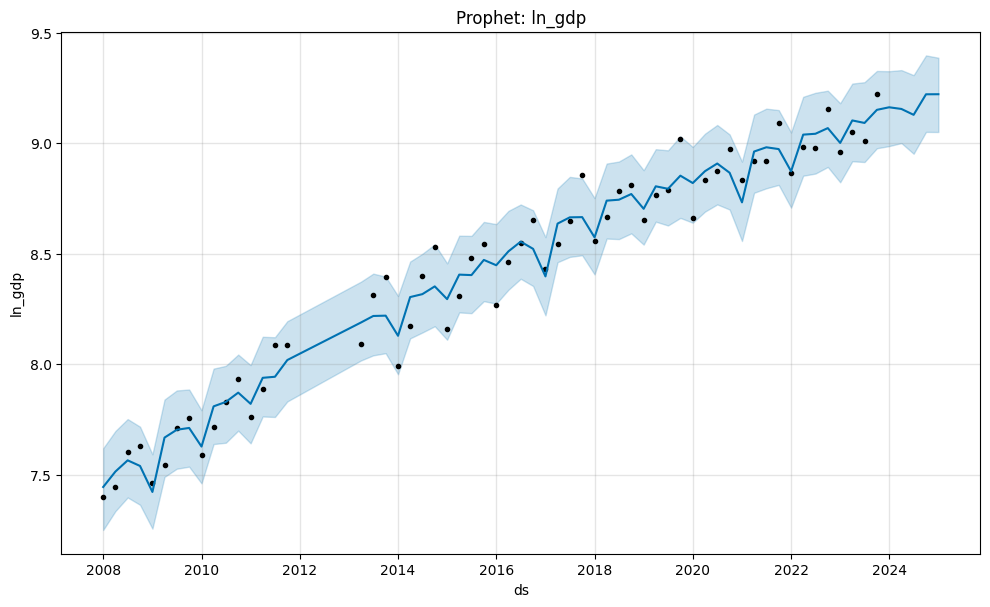

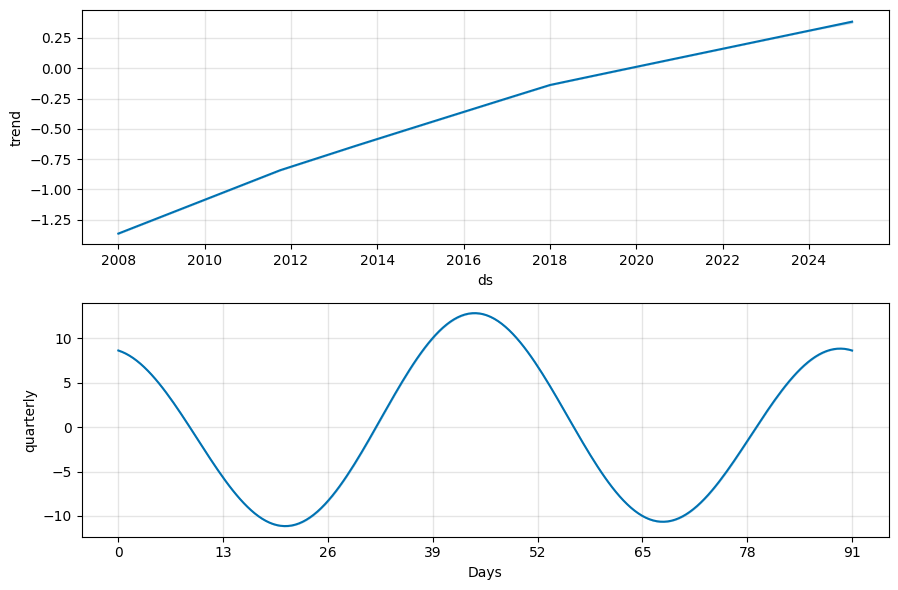

ProphetÊ®°ÂûãÊãüÂêàÂÆåÊàêÔºÅ
ËÆ≠ÁªÉÊï∞ÊçÆÊúüÈó¥: 2008-01-01 00:00:00 Âà∞ 2023-10-01 00:00:00
ËÆ≠ÁªÉÊï∞ÊçÆÈáè: 59


In [21]:
# ProphetÊ®°ÂûãÊãüÂêàln_gdp
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# ÂáÜÂ§áProphetÊï∞ÊçÆÊ†ºÂºè
prophet_data = df[['time', 'ln_gdp']].copy()
prophet_data.columns = ['ds', 'y']  # ProphetË¶ÅÊ±ÇÂàóÂêç‰∏∫ds(Êó∂Èó¥)Âíåy(ÁõÆÊ†áÂèòÈáè)
prophet_data = prophet_data.dropna()

# ÂàõÂª∫ProphetÊ®°Âûã - ÈÄÇÂêàÂ≠£Â∫¶Êï∞ÊçÆ
model = Prophet(
    yearly_seasonality=False,   # ÂÖ≥Èó≠ÈªòËÆ§Âπ¥Â∫¶Â≠£ËäÇÊÄß(‰ºö‰∫ßÁîüËøûÁª≠Ê≥¢Âä®)
    weekly_seasonality=False,   # ÂÖ≥Èó≠Âë®Â≠£ËäÇÊÄß(Â≠£Â∫¶Êï∞ÊçÆ‰∏çÈúÄË¶Å)
    daily_seasonality=False,    # ÂÖ≥Èó≠Êó•Â≠£ËäÇÊÄß(Â≠£Â∫¶Êï∞ÊçÆ‰∏çÈúÄË¶Å)
    seasonality_mode='additive',  # Âä†Ê≥ïÂ≠£ËäÇÊÄß
    interval_width=0.95  # 95%ÁΩÆ‰ø°Âå∫Èó¥
)

# Ê∑ªÂä†Â≠£Â∫¶Â≠£ËäÇÊÄß - ÈíàÂØπÂ≠£Â∫¶Êï∞ÊçÆ‰ºòÂåñ
model.add_seasonality(
    name='quarterly', 
    period=365.25/4,  # ‰∏Ä‰∏™Â≠£Â∫¶ÁöÑÂ§©Êï∞
    fourier_order=2   # ÂáèÂ∞ëÂÇÖÈáåÂè∂È°πÔºåÈÅøÂÖçËøáÂ∫¶Âπ≥Êªë
)

# ÊãüÂêàÊ®°Âûã
model.fit(prophet_data)

# ÂàõÂª∫Êú™Êù•Êó∂Èó¥ÁÇπÁî®‰∫éÈ¢ÑÊµã
future = model.make_future_dataframe(periods=5, freq='Q')  # È¢ÑÊµãÊú™Êù•5‰∏™Â≠£Â∫¶
forecast = model.predict(future)

# ÂèØËßÜÂåñÁªìÊûú
fig1 = model.plot(forecast)
plt.title('Prophet: ln_gdp')
plt.ylabel('ln_gdp')
plt.show()

# ÁªÑ‰ª∂ÂàÜËß£Âõæ
fig2 = model.plot_components(forecast)
plt.show()

print("ProphetÊ®°ÂûãÊãüÂêàÂÆåÊàêÔºÅ")
print(f"ËÆ≠ÁªÉÊï∞ÊçÆÊúüÈó¥: {prophet_data['ds'].min()} Âà∞ {prophet_data['ds'].max()}")
print(f"ËÆ≠ÁªÉÊï∞ÊçÆÈáè: {len(prophet_data)}")

In [12]:
import pickle
import os
save_dir = r"D:\S_data\models"
os.makedirs(save_dir, exist_ok=True)
with open(os.path.join(save_dir, 'prophet.pkl'), 'wb') as f: pickle.dump(model, f)

ProphetÁΩÆ‰ø°Âå∫Èó¥ËÆ°ÁÆóÊñπÊ≥ï
1. Âü∫Êú¨ÂéüÁêÜ
Prophet‰ΩøÁî®**Ê®°ÊãüÊñπÊ≥ïÔºàSimulationÔºâ**Êù•ÁîüÊàêÁΩÆ‰ø°Âå∫Èó¥ÔºåËÄå‰∏çÊòØ‰º†ÁªüÁöÑËß£ÊûêÊñπÊ≥ï„ÄÇ

2. ÂÖ∑‰ΩìÊ≠•È™§
Á¨¨‰∏ÄÊ≠•ÔºöË∂ãÂäø‰∏çÁ°ÆÂÆöÊÄß

ProphetÂØπË∂ãÂäøÂèÇÊï∞ËøõË°åË¥ùÂè∂ÊñØÊé®Êñ≠
‰ªéË∂ãÂäøÂèÇÊï∞ÁöÑÂêéÈ™åÂàÜÂ∏É‰∏≠ÊäΩÊ†∑
ÈªòËÆ§‰ΩøÁî®LaplaceËøë‰ººÊù•‰º∞ËÆ°ÂèÇÊï∞ÁöÑ‰∏çÁ°ÆÂÆöÊÄß
Á¨¨‰∫åÊ≠•ÔºöÂ≠£ËäÇÊÄß‰∏çÁ°ÆÂÆöÊÄß

ÂØπÂ≠£ËäÇÊÄßÊàêÂàÜÁöÑÂÇÖÈáåÂè∂Á≥ªÊï∞ËøõË°åÊäΩÊ†∑
Â≠£ËäÇÊÄßÂèÇÊï∞ÈÄöÂ∏∏ÂÅáËÆæ‰∏∫Ê≠£ÊÄÅÂàÜÂ∏É
Á¨¨‰∏âÊ≠•ÔºöÂô™Â£∞‰∏çÁ°ÆÂÆöÊÄß

‰ªéÂéÜÂè≤ÊÆãÂ∑Æ‰∏≠ËøõË°åbootstrapÊäΩÊ†∑
ÊàñËÄÖÂü∫‰∫éËßÇÊµãÂô™Â£∞ÁöÑÊ†áÂáÜÂ∑ÆËøõË°åÊäΩÊ†∑
Á¨¨ÂõõÊ≠•ÔºöËíôÁâπÂç°Ê¥õÊ®°Êãü
ÈªòËÆ§1000Ê¨°Ê®°Êãü


ÊàëÁî®ÁöÑÁ∫øÊÄßÂáΩÊï∞ÊãüÂêàË∂ãÂäøÔºåÂàÜÊÆµÁöÑ

g(t)=C/1+exp(-K(t-m)) //
ÈÄªËæëÊñØËíÇÂ¢ûÈïøÊõ≤Á∫øÔºåK= Â¢ûÈïøÁéáÔºåm= ÊãêÁÇπÔºåC‰∏∫Êõ≤Á∫øÊ∏êËøëÁ∫ø

ÂàÜÊÆµÈÄªËæëÊñØËíÇÂ¢ûÈïøÊõ≤Á∫ø--Â§öÊãêÁÇπÔºåÊ∏êËøëÁ∫øÂíåÊãêÁÇπÁî±Êï∞ÊçÆËá™Âä®ÊãüÂêà

ËøôÊòØÂõ†‰∏∫ÂÇÖÈáåÂè∂Á∫ßÊï∞ÁöÑÊï∞Â≠¶ÂéüÁêÜ„ÄÇËÆ©ÊàëËß£Èáä‰∏Ä‰∏ãÔºö

## ÂÇÖÈáåÂè∂Á∫ßÊï∞Âü∫Á°Ä

**ÂÇÖÈáåÂè∂Á∫ßÊï∞ÁöÑÂü∫Êú¨ÂΩ¢Âºè**Ôºö
‰ªª‰ΩïÂë®ÊúüÂáΩÊï∞ÈÉΩÂèØ‰ª•Ë°®Á§∫‰∏∫Ê≠£Âº¶Âíå‰ΩôÂº¶ÂáΩÊï∞ÁöÑÊó†Á©∑Á∫ßÊï∞Ôºö



In [ ]:
f(t) = a‚ÇÄ + Œ£[a‚Çô¬∑cos(nœât) + b‚Çô¬∑sin(nœât)]



ÂÖ∂‰∏≠Ôºö
- `œâ = 2œÄ/T`ÔºàTÊòØÂë®ÊúüÔºâ
- `n = 1, 2, 3, ...`ÔºàË∞êÊ≥¢Ê¨°Êï∞Ôºâ

## Prophet‰∏≠ÁöÑfourier_order

**`fourier_order=2`ÁöÑÂÖ∑‰ΩìÂê´‰πâ**Ôºö

ÂΩìËÆæÁΩÆ`fourier_order=2`Êó∂ÔºåProphet‰ºöÂàõÂª∫‰ª•‰∏ãÈ°πÔºö

1. **Á¨¨1ÂØπ**Ôºàn=1ÔºâÔºö
   - `cos(1¬∑œât)` = `cos(2œÄt/T)`
   - `sin(1¬∑œât)` = `sin(2œÄt/T)`

2. **Á¨¨2ÂØπ**Ôºàn=2ÔºâÔºö
   - `cos(2¬∑œât)` = `cos(4œÄt/T)`  
   - `sin(2¬∑œât)` = `sin(4œÄt/T)`

ÊâÄ‰ª•ÊÄªÂÖ±Êúâ**4‰∏™Âü∫ÂáΩÊï∞**Ôºà2ÂØπÊ≠£Âº¶+‰ΩôÂº¶Ôºâ„ÄÇ

## ‰∏∫‰ªÄ‰πàÊòØ"ÂØπ"

**Ê≠£Âº¶Âíå‰ΩôÂº¶ÊòØÊàêÂØπÂá∫Áé∞ÁöÑ**ÔºåÂõ†‰∏∫Ôºö

1. **Áõ∏‰ΩçÂ∑Æ**ÔºöÊ≠£Âº¶Âíå‰ΩôÂº¶ÂáΩÊï∞Áõ∏‰ΩçÂ∑Æ90¬∞ÔºåÂèØ‰ª•Ë°®Á§∫‰ªªÊÑèÁõ∏‰ΩçÁöÑÂë®Êúü‰ø°Âè∑
2. **ÂÆåÂ§áÊÄß**ÔºöÊØè‰∏™È¢ëÁéáÈúÄË¶Å‰∏§‰∏™ÂèÇÊï∞ÔºàÂπÖÂ∫¶ÂíåÁõ∏‰ΩçÔºâÔºåÁî®‰∏ÄÂØπsin/cosÂáΩÊï∞Êù•Ë°®Á§∫
3. **ÁÅµÊ¥ªÊÄß**Ôºö`a¬∑cos(œât) + b¬∑sin(œât)`ÂèØ‰ª•Ë°®Á§∫‰∏∫`R¬∑cos(œât + œÜ)`ÁöÑ‰ªªÊÑèÂπÖÂ∫¶RÂíåÁõ∏‰ΩçœÜ

## ÂÆûÈôÖÂ∫îÁî®Âà∞Â≠£Â∫¶Êï∞ÊçÆ

ÂØπ‰∫éÊÇ®ÁöÑÂ≠£Â∫¶Â≠£ËäÇÊÄßÔºà`period=365.25/4`ÔºâÔºö
- **Âü∫Êú¨Âë®Êúü**Ôºö91.3Â§©
- **Á¨¨1ÂØπ**ÔºöÊçïÊçâÂü∫Êú¨ÁöÑÂ≠£Â∫¶Âë®ÊúüÊÄß
- **Á¨¨2ÂØπ**ÔºöÊçïÊçâ2ÂÄçÈ¢ëÁéáÁöÑÁªÜËäÇÂèòÂåñÔºàÁ∫¶45.6Â§©ÁöÑÊ®°ÂºèÔºâ

ËøôÊ†∑ProphetÂèØ‰ª•Áî®Ëøô4‰∏™ÂèÇÊï∞Êù•ÊãüÂêàÂ§çÊùÇÁöÑÂ≠£Â∫¶Â≠£ËäÇÊÄßÊ®°ÂºèÔºåÊó¢ËÉΩÊçïÊçâ‰∏ªË¶ÅÁöÑÂ≠£Â∫¶ÂèòÂåñÔºåÂèàËÉΩÂ§ÑÁêÜÂ≠£Â∫¶ÂÜÖÁöÑÁªÜÂæÆÊ≥¢Âä®„ÄÇ

**ÁÆÄÂçïÊù•ËØ¥**Ôºö`fourier_order=n`Â∞±ÊòØÁî®Ââçn‰∏™È¢ëÁéáÁöÑÊ≠£Âº¶‰ΩôÂº¶ÂØπÊù•Ëøë‰ººÊÇ®ÁöÑÂ≠£ËäÇÊÄßÊ®°ÂºèÔºåÈ¢ëÁéáË∂äÈ´òÔºåËÉΩÊçïÊçâÁöÑÁªÜËäÇË∂äÂ§öÔºå‰ΩÜ‰πüË∂äÂÆπÊòìËøáÊãüÂêà„ÄÇ

In [23]:
# ‰øùÂ≠òÊï∞ÊçÆÈõÜdf‰∏∫CSVÊ†ºÂºèÂà∞Ê®°ÂûãÁõÆÂΩï
import os

save_dir = r"D:\S_data\models"
os.makedirs(save_dir, exist_ok=True)

# ‰øùÂ≠òdfÊï∞ÊçÆÈõÜ‰∏∫CSVÔºåÂëΩÂêç‰∏∫df_plus
csv_path = os.path.join(save_dir, 'df_plus.csv')
df.to_csv(csv_path, index=False, encoding='utf-8-sig')

In [20]:
# ProphetÊ®°ÂûãÊªöÂä®Á™óÂè£È¢ÑÊµãËØÑ‰º∞
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# ÂáÜÂ§áProphetÊï∞ÊçÆÊ†ºÂºè
prophet_data = df[['time', 'ln_gdp']].copy()
prophet_data.columns = ['ds', 'y']  # ProphetË¶ÅÊ±ÇÂàóÂêç‰∏∫ds(Êó∂Èó¥)Âíåy(ÁõÆÊ†áÂèòÈáè)
prophet_data = prophet_data.dropna()

def rolling_prophet_prediction(data, window=40, steps=5):
    """ProphetÊ®°ÂûãÊªöÂä®Á™óÂè£È¢ÑÊµã"""
    mse_list = []
    predictions_all = []
    actuals_all = []
    
    # ÊªöÂä®Á™óÂè£È¢ÑÊµã
    for i in range(window, len(data) - steps + 1):
        try:
            # ËÆ≠ÁªÉÊï∞ÊçÆ
            train_data = data.iloc[i-window:i].copy()
            test_data = data.iloc[i:i+steps].copy()
            
            # ÂàõÂª∫ProphetÊ®°Âûã
            model_rolling = Prophet(
                yearly_seasonality=False,
                weekly_seasonality=False,
                daily_seasonality=False,
                seasonality_mode='additive'
            )
            model_rolling.add_seasonality(name='quarterly', period=365.25/4, fourier_order=2)
            
            # ÊãüÂêàÂíåÈ¢ÑÊµã
            model_rolling.fit(train_data)
            future = model_rolling.make_future_dataframe(periods=steps, freq='Q')
            forecast = model_rolling.predict(future)
            
            # ËÆ°ÁÆóMSE
            pred_values = forecast['yhat'].iloc[-steps:].values
            actual_values = test_data['y'].values
            window_mse = mean_squared_error(actual_values, pred_values)
            mse_list.append(window_mse)
            
            predictions_all.extend(pred_values)
            actuals_all.extend(actual_values)
        except:
            continue
    
    avg_mse = np.mean(mse_list) if mse_list else float('inf')
    overall_mse = mean_squared_error(actuals_all, predictions_all) if actuals_all else float('inf')
    return mse_list, avg_mse, overall_mse

# ÊâßË°åProphetÊªöÂä®Á™óÂè£ËØÑ‰º∞
mse_list, avg_mse, overall_mse = rolling_prophet_prediction(prophet_data, window=40, steps=5)

print(f"ÊàêÂäüÈ¢ÑÊµãÁ™óÂè£Êï∞: {len(mse_list)}")
print(f"ÊâÄÊúâÈ¢ÑÊµãÁöÑÊï¥‰ΩìMSE: {overall_mse:.6f}")
print(f"MSEÊúÄÂ∞èÂÄº: {np.min(mse_list):.6f}")
print(f"MSEÊúÄÂ§ßÂÄº: {np.max(mse_list):.6f}")



22:14:02 - cmdstanpy - INFO - Chain [1] start processing
22:14:02 - cmdstanpy - INFO - Chain [1] done processing
22:14:02 - cmdstanpy - INFO - Chain [1] done processing
22:14:02 - cmdstanpy - INFO - Chain [1] start processing
22:14:02 - cmdstanpy - INFO - Chain [1] start processing
22:14:02 - cmdstanpy - INFO - Chain [1] done processing
22:14:02 - cmdstanpy - INFO - Chain [1] done processing
22:14:02 - cmdstanpy - INFO - Chain [1] start processing
22:14:02 - cmdstanpy - INFO - Chain [1] start processing
22:14:02 - cmdstanpy - INFO - Chain [1] done processing
22:14:02 - cmdstanpy - INFO - Chain [1] done processing
22:14:03 - cmdstanpy - INFO - Chain [1] start processing
22:14:03 - cmdstanpy - INFO - Chain [1] start processing
22:14:03 - cmdstanpy - INFO - Chain [1] done processing
22:14:03 - cmdstanpy - INFO - Chain [1] done processing
22:14:03 - cmdstanpy - INFO - Chain [1] start processing
22:14:03 - cmdstanpy - INFO - Chain [1] start processing
22:14:03 - cmdstanpy - INFO - Chain [1]

ÊàêÂäüÈ¢ÑÊµãÁ™óÂè£Êï∞: 15
ÊâÄÊúâÈ¢ÑÊµãÁöÑÊï¥‰ΩìMSE: 0.012662
MSEÊúÄÂ∞èÂÄº: 0.001654
MSEÊúÄÂ§ßÂÄº: 0.026131
